In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix,log_loss
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
df.shape

(100000, 28)

In [5]:
df.size

2800000

In this dataset there is 28 columns and 100000 rows. There is both numerical and categorical columns in this dataset with datatypes as object, float and int. 

#### Checking Duplicates

In [6]:
df[df.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


There is no duplicates in the data

#### Unique items

In [7]:
col= df.columns.to_list()
col

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [8]:
for i in col:
    print(i)
    print(df[i].unique())
    print()
    print('*****')

ID
['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']

*****
Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

*****
Month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

*****
Name
['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

*****
Age
['23' '-500' '28_' ... '4808_' '2263' '1342']

*****
SSN
['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']

*****
Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

*****
Annual_Income
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

*****
Monthly_Inhand_Salary
[1824.843333         nan 3037.986667 ... 3097.008333 1929.906667
 3359.415833]

*****
Num_Bank_Accounts
[   3    2    1    7    4    0    8    5    6    9   10 1414 

### Checking total missing values

In [9]:
(df.isnull().sum().sum() / (df.size)) * 100

2.1453928571428573

There is only 2% missing values , so can't able to drop it

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.63333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.00000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.00000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.00000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.00000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.00000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.00000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.00000


**Customer_ID**

In [11]:
df['Customer_ID'].nunique()

12500

**Month**

The Month column in the dataset represents the month in which specific transactions or financial activities occurred.

In [12]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

 There are a total of 12,500 unique customers, and the details are for the first 8 months.

****Age****

In [13]:
# Get the first 20 rows where the "age" column contains non-numeric values or missing data.
df[pd.to_numeric(df["Age"], errors="coerce").isna()]["Age"].head(20)

8      28_
54     34_
58     30_
71     24_
89     33_
97     35_
123    30_
184    31_
227    40_
236    37_
240    54_
256    21_
277    37_
311    37_
326    33_
359    20_
381    30_
387    43_
399    38_
524    18_
Name: Age, dtype: object

In [14]:
df['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [15]:
# Clean up the "age" column by removing hyphens and underscores.
df['Age'] = df['Age'].str.replace('_', '').str.replace('-', '')


In [16]:
# Convert the "age" column to numeric values, downcasting to the smallest integer type.
df["Age"] = pd.to_numeric(df["Age"], downcast="integer")

# Check the data type of the "age" column.
df["Age"].dtype


dtype('int16')

In [17]:
# Group by "customer_id" and count the occurrences of each "age" value within each group.
df.groupby(["Customer_ID"])['Age'].value_counts().sort_index().head(20)

Customer_ID  Age 
CUS_0x1000   17      5
             18      3
CUS_0x1009   25      2
             26      6
CUS_0x100b   18      4
             19      4
CUS_0x1011   43      1
             44      7
CUS_0x1013   43      2
             44      6
CUS_0x1015   27      7
             4510    1
CUS_0x1018   15      8
CUS_0x1026   51      4
             52      4
CUS_0x102d   30      5
             31      3
CUS_0x102e   25      2
             26      6
CUS_0x1032   40      7
Name: count, dtype: int64

In [18]:
# Treating anomalies
df['Age'].value_counts().sort_index().head(50)

Age
14     1175
15     1574
16     1455
17     1502
18     2385
19     2793
20     2744
21     2716
22     2785
23     2654
24     2714
25     2861
26     2945
27     2859
28     2968
29     2735
30     2727
31     2955
32     2884
33     2543
34     2837
35     2866
36     2868
37     2742
38     2994
39     2846
40     2609
41     2785
42     2577
43     2734
44     2824
45     2642
46     1621
47     1227
48     1385
49     1375
50     1273
51     1291
52     1356
53     1354
54     1311
55     1366
56      362
95        3
99        1
100       1
102       1
109       1
111       1
112       1
Name: count, dtype: int64

After  age 56 the counts like 1, it can't be like that because the details are for 8 months so age value can't be like this or else the previous age value count should be 7. So need to treat this

In [19]:
# Total count of values in the 'Age' column
total_count = df['Age'].count()

# Count of values > 56 in the 'Age' column
filtered_count = (df['Age'] > 56).sum()


In [20]:
# Calculating the percentage 
(filtered_count / total_count) * 100

2.781

so there are 2.7 % values in age column is like this so we are making this to nan and imputing this values use bfill and ffill.

In [21]:
# Making persons above 56 to NaN
df.loc[(df['Age'] > 56), 'Age'] = pd.NA

**Occupation**               

In [22]:
# Treating anomalies
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [23]:
# Replacing "______" using nan
df['Occupation'] = df['Occupation'].replace('_______', pd.NA)

In [24]:
# Finding mode of each group of customers
occupation_mode = df.groupby('Customer_ID')['Occupation'].agg(lambda x: x.mode().iloc[0])

In [25]:
# imputing the mode to each group of customers
df['Occupation'] = df['Customer_ID'].map(occupation_mode)

In [26]:
df['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

The anomalies in occupation column has been treated

**Monthly Inhand Salary**


The Monthly_Inhand_Salary column represents the amount of salary a customer receives after deductions, such as taxes and other withholdings.

In [27]:
df['Monthly_Inhand_Salary']

0        1824.843333
1                NaN
2                NaN
3                NaN
4        1824.843333
            ...     
99995    3359.415833
99996    3359.415833
99997    3359.415833
99998    3359.415833
99999    3359.415833
Name: Monthly_Inhand_Salary, Length: 100000, dtype: float64

In [28]:
unique_values_df = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].unique().reset_index()

# Rename columns
unique_values_df.columns = ['Customer_ID', 'Unique_Salaries']

# Count the number of unique salaries for each customer
unique_values_df['Num_Unique_Salaries'] = unique_values_df['Unique_Salaries'].apply(len)

# Display customers with more than 1 unique salary
multiple_salaries = unique_values_df[unique_values_df['Num_Unique_Salaries'] > 1]

print(f"Number of customers with multiple unique salaries: {len(multiple_salaries)}")


Number of customers with multiple unique salaries: 9313


In [29]:
# Checking null values
df['Monthly_Inhand_Salary'].isnull().sum()

15002

**Annual income**

The Annual_Income column represents the total income a customer earns in a year before any deductions, such as taxes or other withholdings.

In [30]:
# Checking unique items
df['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [31]:
df.groupby(['Customer_ID'])['Annual_Income'].count()

Customer_ID
CUS_0x1000    8
CUS_0x1009    8
CUS_0x100b    8
CUS_0x1011    8
CUS_0x1013    8
             ..
CUS_0xff3     8
CUS_0xff4     8
CUS_0xff6     8
CUS_0xffc     8
CUS_0xffd     8
Name: Annual_Income, Length: 12500, dtype: int64

In [32]:
# Checking null values
df['Annual_Income'].isnull().sum()

0

In [33]:
df['Annual_Income'].describe()

count       100000
unique       18940
top       36585.12
freq            16
Name: Annual_Income, dtype: object

In [34]:
# Checking counts
df.groupby(['Customer_ID'])['Annual_Income'].value_counts().sort_index().head(50)

Customer_ID  Annual_Income
CUS_0x1000   30625.94         7
             30625.94_        1
CUS_0x1009   52312.68         7
             52312.68_        1
CUS_0x100b   113781.39        8
CUS_0x1011   58918.47         8
CUS_0x1013   98620.98         8
CUS_0x1015   46951.02         8
CUS_0x1018   17117486         1
             61194.81         7
CUS_0x1026   170614.28        8
CUS_0x102d   89064.52         8
CUS_0x102e   50807.44         6
             50807.44_        2
CUS_0x1032   60410.94         8
CUS_0x1037   15989.085        8
CUS_0x1038   129473.16        8
CUS_0x103e   98690.8          8
CUS_0x1041   8978.11          8
CUS_0x1044   33441.59         8
CUS_0x1048   42387.54         7
             42387.54_        1
CUS_0x104a   14981.39         8
CUS_0x104e   19180.87         8
CUS_0x104f   11336.835        8
CUS_0x1051   35022.22         8
CUS_0x1056   16053.86         8
CUS_0x1057   1105753          1
             86617.16         7
CUS_0x105b   34428.21         7
             

In [35]:
# Replacing underscore 
df['Annual_Income'] = df['Annual_Income'].str.replace('_','',regex = False)

In [36]:
df['Annual_Income'].unique()

array(['19114.12', '34847.84', '143162.64', ..., '37188.1', '20002.88',
       '39628.99'], dtype=object)

In [37]:
# Converting to numeric
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'],errors = 'coerce')

# Checking data type
df["Annual_Income"].dtype


dtype('float64')

**Num_Bank_Accounts**

In [38]:
df["Num_Bank_Accounts"].isnull().sum()

0

In [39]:
df["Num_Bank_Accounts"].unique()

array([   3,    2,    1,    7,    4,    0,    8,    5,    6,    9,   10,
       1414, 1231,   67,  572, 1488,   91,  528, 1647, 1696, 1338,  649,
        889, 1668,  685,  857,  975, 1496, 1534, 1620,   37, 1388, 1429,
       1332, 1588,  120, 1777, 1096,  803,  494,  744, 1139,  831, 1613,
        741,  121,  665, 1748, 1644,  823, 1356, 1651,   87,  711,  450,
        210, 1671, 1722,  648,  672, 1662, 1495,  510,  666,  429, 1131,
       1434,  980, 1026,  526,  718, 1300, 1312, 1315,  501, 1566,  480,
       1042,  322,  628, 1016,  333, 1265,  791,  427,  563,  905, 1190,
       1036, 1611,   38,  619,  555, 1769,  280,  752, 1201,  812, 1487,
        222,  212, 1019, 1222,  610, 1714, 1308,  525, 1158, 1115, 1616,
        754, 1601,  797, 1577,  521,  703,  933,  959,  809, 1089, 1656,
       1113, 1715,  964, 1533, 1789,  871,  434, 1295,  565, 1724,  603,
        677,  541,  698, 1101,  464, 1539, 1462, 1011, 1257, 1727,   45,
        244, 1266,  897,  535,  484,  331,  675,  8

In [40]:
# Checking counts
df['Num_Bank_Accounts'].value_counts().sort_index().head(20)

Num_Bank_Accounts
-1        21
 0      4328
 1      4490
 2      4304
 3     11950
 4     12186
 5     12118
 6     13001
 7     12823
 8     12765
 9      5443
 10     5247
 11        9
 18        1
 26        1
 27        1
 28        3
 29        1
 30        1
 31        1
Name: count, dtype: int64

In [41]:
 # Taking absolute of values because there is negative values which can't be in number of bank accounts
df["Num_Bank_Accounts"] = df["Num_Bank_Accounts"].abs()

After 11 the number of counts is less and having accounts more than 11 doesn't make sense. So finding how much % of rows are like these.

In [42]:
# Total count of values in the 'Num_Bank_Accounts' column
total_count = df['Num_Bank_Accounts'].count()

# Count of values >11 in the 'Num_Bank_Accounts' column
filtered_count = (df['Num_Bank_Accounts'] >11 ).sum()


In [43]:
# Calculating the percentage 
(filtered_count / total_count) * 100

1.315

There is only 1.315 % of rows with these extreme values

In [44]:
# Making number of accounts above 11 to NaN
df.loc[(df['Num_Bank_Accounts'] > 11), 'Num_Bank_Accounts'] = pd.NA

**Num_Credit_Card**

In [45]:
df["Num_Credit_Card"].unique()

array([   4, 1385,    5, ...,  955, 1430,  679], dtype=int64)

In [46]:
# Checking counts
df['Num_Credit_Card'].value_counts().sort_index().head(20)

Num_Credit_Card
0        13
1      2132
2      2149
3     13277
4     14030
5     18459
6     16559
7     16615
8      4956
9      4643
10     4860
11       36
15        3
16        2
17        1
18        1
20        1
21        1
22        2
24        1
Name: count, dtype: int64

After 11 here also count is less, so calculating how much percentage

In [47]:
# Total count of values in the 'Num_Credit_Card' column
total_count = df['Num_Credit_Card'].count()

# Count of values >11 in the 'Num_Credit_Card' column
filtered_count = (df['Num_Credit_Card'] >11 ).sum()


In [48]:
# Calculating the percentage 
(filtered_count / total_count) * 100

2.271

2.271 % of rows have extreme values so making that to nan and imputing

In [49]:
# Making number of accounts above 11 to NaN
df.loc[(df['Num_Credit_Card'] > 11), 'Num_Credit_Card'] = pd.NA

**Type_of_Loan**

In [50]:
# no.of missing values
df['Type_of_Loan'].isnull().sum()

11408

In [51]:
df.groupby('Customer_ID')['Type_of_Loan'].value_counts().tail(10)

Customer_ID  Type_of_Loan                                                                                                                                                      
CUS_0xfdd    Mortgage Loan, Personal Loan, Mortgage Loan, Mortgage Loan, Payday Loan, Home Equity Loan, and Debt Consolidation Loan                                                8
CUS_0xfdf    Home Equity Loan, Auto Loan, and Home Equity Loan                                                                                                                     8
CUS_0xfe3    Personal Loan, Personal Loan, Not Specified, and Payday Loan                                                                                                          8
CUS_0xfe4    Credit-Builder Loan, Debt Consolidation Loan, Debt Consolidation Loan, Debt Consolidation Loan, Debt Consolidation Loan, Credit-Builder Loan, and Home Equity Loan    8
CUS_0xfea    Student Loan, and Student Loan                                                         

In [52]:
# Group by customer_id and fill missing values in 'type_of_loan' with mode or No loan
df['Type_of_Loan'] = df.groupby('Customer_ID')['Type_of_Loan'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'no loan')
)

In [53]:
# no.of missing values
df['Type_of_Loan'].isnull().sum()

0

A person itself is taking same type of loan more than once that also is marked in type of loan (studentloan two time, personal loan two times). So from this number of loan taken can also be found out

In [54]:
# Removes the string " and" from the 'type_of_loan' column for easiness
df["Type_of_Loan"] = df["Type_of_Loan"].str.replace(" and", "", regex=False)

# Splits the 'type_of_loan' column by ", " to create a list of loan types for each row.
df["Type_of_Loan"] = df["Type_of_Loan"].str.split(", ")

In [55]:
# Extracting unique loan types from the 'Type_of_Loan' column
unique_loans = pd.Series(df['Type_of_Loan'].explode().unique())
unique_loans

0                  Auto Loan
1        Credit-Builder Loan
2              Personal Loan
3           Home Equity Loan
4              Not Specified
5                    no loan
6              Mortgage Loan
7               Student Loan
8    Debt Consolidation Loan
9                Payday Loan
dtype: object

**Num_of_Loan**

In [56]:
# Treating anomalies
df['Num_of_Loan'].value_counts().sort_index().head(20)

Num_of_Loan
-100      3876
0        10380
0_         550
1        10083
100          1
1001         1
1002         1
1006         1
1008         1
101          1
1014         1
1015         1
1017         2
1019         1
1023         1
1027_        1
103          1
1030         1
1035         1
1036         1
Name: count, dtype: int64

In [57]:
# Replacing underscore with space
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace("_", "")

In [58]:
# Convert to integer
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df['Num_of_Loan'].dtype

dtype('int64')

In [59]:
df.groupby('Customer_ID')['Num_of_Loan'].value_counts().sort_index().head(50)

Customer_ID  Num_of_Loan
CUS_0x1000    2             8
CUS_0x1009    4             7
              1094          1
CUS_0x100b    0             8
CUS_0x1011    3             8
CUS_0x1013    3             8
CUS_0x1015    0             8
CUS_0x1018   -100           1
              8             7
CUS_0x1026    2             8
CUS_0x102d    1             8
CUS_0x102e    4             8
CUS_0x1032    4             8
CUS_0x1037    4             8
CUS_0x1038   -100           1
              3             7
CUS_0x103e    1             8
CUS_0x1041    9             8
CUS_0x1044    0             8
CUS_0x1048    7             7
              1222          1
CUS_0x104a    4             8
CUS_0x104e   -100           1
              4             7
CUS_0x104f    6             8
CUS_0x1051    1             8
CUS_0x1056    5             8
CUS_0x1057    3             8
CUS_0x105b    0             8
CUS_0x105c    3             8
CUS_0x1063    4             8
CUS_0x1069   -100           1
              3

In [60]:
# Treating anomalies
df['Num_of_Loan'].value_counts().sort_index().head(20)

Num_of_Loan
-100     3876
 0      10930
 1      10606
 2      15032
 3      15104
 4      14743
 5       7197
 6       7803
 7       7344
 8       3191
 9       3702
 17         1
 18         1
 19         1
 23         2
 27         1
 29         1
 31         2
 32         1
 33         2
Name: count, dtype: int64

There is -100 as value which is illogical  and from 17 the count of values are less, and having 17 loans and more is not acceptable. So finding how much percentage are there like this

In [61]:
# Total count of values in the 'Num_of_Loan' column
total_count = df['Num_of_Loan'].count()

# Count of values >= 17 in the 'Num_of_Loan' column
failtered_count = ((df['Num_of_Loan'] >= 17) | (df['Num_of_Loan'] < 0)).sum()


In [62]:
# Calculating the percentage 
(filtered_count / total_count) * 100

2.271

In [63]:
# There is 4.348 columns as extreme values

In [64]:
# Making those invalid values to nan 

df.loc[(df['Num_of_Loan'] >= 17) | (df['Num_of_Loan'] < 0), 'Num_of_Loan'] = pd.NA

**Interest_Rate**

The Interest_Rate column represents the interest rate applied to loans.

In [65]:
# Treating anomalies
df['Interest_Rate'].value_counts().sort_index().head(50)

Interest_Rate
1     2683
2     2465
3     2765
4     2589
5     4979
6     4721
7     4494
8     5012
9     4494
10    4540
11    4428
12    4540
13    2384
14    2229
15    3992
16    3730
17    3813
18    4102
19    3630
20    3929
21    1560
22    1720
23    1683
24    1685
25    1566
26    1489
27    1608
28    1616
29    1662
30    1690
31    1457
32    1742
33    1467
34    1502
59       1
60       1
64       1
67       1
73       1
74       1
75       2
76       2
77       1
81       1
87       1
89       1
91       1
92       1
94       1
95       2
Name: count, dtype: int64

After 34 there are extreme values and the counts are also less for that values, so need to find how many rows are there with extreme values

In [66]:
# Total count of values in the 'Interest_Rate' column
total_count = df['Interest_Rate'].count()

# Count of values >= 59 in the 'Interest_Rate' column
filtered_count = (df['Interest_Rate'] >= 59).sum()


In [67]:
# Calculating the percentage 
(filtered_count / total_count) * 100

2.0340000000000003

Only 2.03 % of rows has values like this

In [68]:
# Checking  interest rates in each groups of customers
df.groupby('Customer_ID')['Interest_Rate'].value_counts().head(30)

Customer_ID  Interest_Rate
CUS_0x1000   27               8
CUS_0x1009   17               8
CUS_0x100b   1                8
CUS_0x1011   17               8
CUS_0x1013   6                8
CUS_0x1015   16               8
CUS_0x1018   23               8
CUS_0x1026   9                7
             5131             1
CUS_0x102d   1                7
             990              1
CUS_0x102e   11               8
CUS_0x1032   17               8
CUS_0x1037   2                7
             3641             1
CUS_0x1038   10               8
CUS_0x103e   9                8
CUS_0x1041   30               8
CUS_0x1044   1                8
CUS_0x1048   26               8
CUS_0x104a   5                8
CUS_0x104e   18               8
CUS_0x104f   14               8
CUS_0x1051   4                8
CUS_0x1056   24               8
CUS_0x1057   6                8
CUS_0x105b   8                7
             849              1
CUS_0x105c   5                8
CUS_0x1063   10               8
Name: count, 

Since the number of loans for customers in all 8 months are same so the interest rate for these months also is same.

In [69]:
# Making Interest_Rate equal to and above 59 to NaN

df.loc[(df['Interest_Rate'] >= 59), 'Interest_Rate'] = pd.NA

**Delay_from_due_date**

The Delay_from_due_date column represents the number of days a payment is overdue

In [70]:
df["Delay_from_due_date"].isnull().sum()

0

In [71]:
df["Delay_from_due_date"].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

In [72]:
#Taking counts
df['Delay_from_due_date'].value_counts().sort_index().tail(50)

Delay_from_due_date
18    2637
19    2638
20    2489
21    2411
22    2334
23    2387
24    2533
25    2506
26    2386
27    2623
28    2397
29    2383
30    2309
31     802
32     787
33     791
34     675
35     614
36     594
37     490
38     592
39     525
40     572
41     586
42     623
43     502
44     602
45     536
46     490
47     654
48     628
49     538
50     576
51     535
52     625
53     585
54     624
55     560
56     555
57     552
58     553
59     507
60     533
61     514
62     545
63      69
64      64
65      56
66      32
67      22
Name: count, dtype: int64

Negative values says about amount paid before due date and postive values says about amount paid after due date

In [73]:
# Checking  Delay_from_due_date in each groups of customers
df.groupby('Customer_ID')['Delay_from_due_date'].value_counts().head(30)

Customer_ID  Delay_from_due_date
CUS_0x1000    62                    5
              57                    1
              64                    1
              67                    1
CUS_0x1009    8                     5
              3                     1
              5                     1
              10                    1
CUS_0x100b    14                    5
              9                     1
              10                    1
              19                    1
CUS_0x1011    27                    7
              29                    1
CUS_0x1013    12                    7
              16                    1
CUS_0x1015    8                     5
              9                     2
              6                     1
CUS_0x1018    24                    7
              19                    1
CUS_0x1026    0                     6
             -5                     1
             -4                     1
CUS_0x102d    6                     7
              1  

**Num_of_Delayed_Payment**

The Num_of_Delayed_Payment column represents the number of times a customer has delayed their payment beyond the due date.

In [74]:
df["Num_of_Delayed_Payment"].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [75]:
# Treating anomalies
df['Num_of_Delayed_Payment'].value_counts().sort_index().head(50)

Num_of_Delayed_Payment
-1        308
-1_         8
-2        223
-2_        11
-3         91
-3_         3
0        1568
0_         41
1        1586
10       5153
1004        1
1014        2
1015        1
1018        1
102         1
1034        1
1045        1
1049        1
106         1
1060        1
1061        1
1063        1
107         1
1073        1
1079        1
1086        1
1087        1
1087_       1
1096        1
10_       156
11       4667
1106        1
1133        1
1150        2
1154        1
1164        1
1172        1
1177        1
1178        1
1180        2
1181        1
1184        1
1191        1
1192        1
1199        1
11_       143
12       4905
1204        2
121         1
1211        1
Name: count, dtype: int64

In [76]:
df["Num_of_Delayed_Payment"].isnull().sum()


7002

In [77]:
# Clean up the "Num_of_Delayed_Payment" column by removing hyphens and underscores.

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '').str.replace('-', '')


In [78]:
 # Convert to numeric and coerce errors to NaN

df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

df["Num_of_Delayed_Payment"].dtype

dtype('float64')

In [79]:
# Total count of values in the 'Num_of_Delayed_Payment' column
total_count = df['Num_of_Delayed_Payment'].count()

# Count of values >= 46 in the 'Interest_Rate' column
filtered_count = (df['Num_of_Delayed_Payment'] >= 46).sum()


In [80]:
# Calculating the percentage 
(filtered_count / total_count) * 100

0.7914148691369707

Only 0.736 % of rows have invalid values

In [81]:
# Making Num_of_Delayed_Payment equal to and above 46 to NaN

df.loc[(df['Num_of_Delayed_Payment'] >= 46), 'Num_of_Delayed_Payment'] = pd.NA

**Changed_Credit_Limit**

Changed credit limit refers to an adjustment made to the maximum amount of credit a borrower can access on a credit account, either increasing or decreasing it based on factors like creditworthiness or account activity.

In [82]:
# Value counts
df['Changed_Credit_Limit'].value_counts().sort_index().head(30)

Changed_Credit_Limit
-0.01    4
-0.02    6
-0.03    3
-0.04    9
-0.05    5
-0.06    4
-0.07    7
-0.08    4
-0.09    1
-0.1     4
-0.11    5
-0.12    4
-0.13    7
-0.14    6
-0.15    4
-0.16    4
-0.17    2
-0.18    3
-0.19    6
-0.2     3
-0.22    5
-0.23    7
-0.24    3
-0.25    4
-0.26    5
-0.27    3
-0.28    2
-0.29    3
-0.3     3
-0.31    5
Name: count, dtype: int64

In [83]:
df['Changed_Credit_Limit'].describe(exclude = np.number).T

count     100000
unique      3635
top            _
freq        2091
Name: Changed_Credit_Limit, dtype: object

In [84]:
# Checking unique items
df['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '27.38', '25.16', '21.17'], dtype=object)

Replacing underscore with zero, it implies that that month they don't have any change in there credit limit. And positive values says increase in credit limit and negative

In [85]:
# Replace underscore with 0
df.loc[df["Changed_Credit_Limit"] == "_", "Changed_Credit_Limit"] = 0

In [86]:
df['Changed_Credit_Limit'].unique()

array(['11.27', 0, '6.27', ..., '27.38', '25.16', '21.17'], dtype=object)

In [87]:
# Convert to numeric and coerce errors to NaN
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

df["Changed_Credit_Limit"].dtype

dtype('float64')

**Num_Credit_Inquiries**

The Num_Credit_Inquiries column represents the number of credit inquiries made on a customer's credit report. 

In [88]:
# Checking missing values
df['Num_Credit_Inquiries'].isnull().sum()

1965

In [89]:
df['Num_Credit_Inquiries'].unique()

array([   4.,    2.,    3., ..., 1361.,  310.,   74.])

In [90]:
df['Num_Credit_Inquiries'].isnull().sum()

1965

In [91]:
df['Num_Credit_Inquiries'].value_counts().sort_index().head(50)

Num_Credit_Inquiries
0.0      6972
1.0      7588
2.0      8028
3.0      8890
4.0     11271
5.0      5693
6.0      8111
7.0      8058
8.0      7866
9.0      5283
10.0     4936
11.0     5051
12.0     4571
13.0     1480
14.0     1039
15.0      808
16.0      456
17.0      284
26.0        1
29.0        1
31.0        4
32.0        2
33.0        1
34.0        1
37.0        1
43.0        1
45.0        1
46.0        2
49.0        1
52.0        2
53.0        4
54.0        1
57.0        1
59.0        3
60.0        1
61.0        1
63.0        1
64.0        1
66.0        1
67.0        1
70.0        1
71.0        2
74.0        1
76.0        2
78.0        1
83.0        1
86.0        3
87.0        1
89.0        1
93.0        2
Name: count, dtype: int64

After 29 times the counts are less like one and are having extreme values which is not practically possible. so making those values to nan and imputing

In [92]:
# Total count of values in the 'Num_Credit_Inquiries' column
total_count = df['Num_Credit_Inquiries'].count()

# Count of values >= 29 in the 'Num_Credit_Inquiries' column
filtered_count = (df['Num_Credit_Inquiries'] >= 29).sum()


In [93]:
# Calculating the percentage 
(filtered_count / total_count) * 100

1.6820523282501147

There is only 1.649% of data like this

In [94]:
# Making Num_Credit_Inquiries equal to and above 29 to NaN

df.loc[(df['Num_Credit_Inquiries'] >= 29), 'Num_Credit_Inquiries'] = pd.NA

**Credit Mix**

The Credit_Mix column represents the variety of credit types a customer uses, such as credit cards, loans, and mortgages. A balanced credit mix can positively affect a customer's credit score by demonstrating their ability to manage different types of credit.

In [95]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [96]:
# Checking counts in each group

df.groupby("Customer_ID")["Credit_Mix"].value_counts()

Customer_ID  Credit_Mix
CUS_0x1000   Bad           8
CUS_0x1009   Standard      5
             _             3
CUS_0x100b   Good          7
             _             1
                          ..
CUS_0xff6    _             1
CUS_0xffc    Bad           6
             _             2
CUS_0xffd    Standard      6
             _             2
Name: count, Length: 22977, dtype: int64

In [97]:
# Replacing "_" with NaN

df.loc[(df["Credit_Mix"] == "_"), "Credit_Mix"] = np.nan

In [98]:
# Filling NaN values using ffill and bfill in each group
df["Credit_Mix"] = df.groupby("Customer_ID")["Credit_Mix"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

In [99]:
df['Credit_Mix'].isnull().sum()

0

In [100]:
# Checking counts in each group

df.groupby("Customer_ID")["Credit_Mix"].value_counts()

Customer_ID  Credit_Mix
CUS_0x1000   Bad           8
CUS_0x1009   Standard      8
CUS_0x100b   Good          8
CUS_0x1011   Standard      8
CUS_0x1013   Good          8
                          ..
CUS_0xff3    Good          8
CUS_0xff4    Standard      8
CUS_0xff6    Good          8
CUS_0xffc    Bad           8
CUS_0xffd    Standard      8
Name: count, Length: 12500, dtype: int64

**Outstanding Debt**

The Outstanding_Debt column reflects the total unpaid debt that a customer owes, including balances from loans, credit cards, and other credit lines.

In [101]:
df['Outstanding_Debt'].value_counts().head(60)

Outstanding_Debt
1360.45    24
460.46     23
1151.7     23
1109.03    23
467.7      16
395.46     16
1194.38    16
438.75     16
729.74     16
559.23     16
1132.46    16
854.72     16
482.99     16
478.11     16
1803.18    16
1170.58    16
1158.96    16
100.3      16
298.5      16
646.98     16
2646       16
255.82     16
441.46     16
1211.41    16
1343.5     16
3626.94    16
1115.06    16
2555.9     16
1453.63    16
69.84      16
139.77     16
904.83     16
466.13     16
850.79     16
352.44     16
248.84     16
1259.92    16
402.54     16
1484.37    16
10.29      16
463.57     16
6.41       16
462.11     16
494.31     16
2085.35    16
557.78     16
208.96     16
288.32     16
217.92     16
901.52     16
467.64     16
1428.31    16
1454.68    16
129.15     16
1455.64    16
824.36     16
1135.31    16
1612.7     16
795.69     16
861.13     16
Name: count, dtype: int64

In [102]:
# Checking unique items

df["Outstanding_Debt"].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [103]:
# Checking null

df['Outstanding_Debt'].isnull().sum()

0

In [104]:
# Replacing _ with space

df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '', regex=False)

In [105]:
# Convering to float
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

df["Outstanding_Debt"].dtype

dtype('float64')

**Credit_Utilization_Ratio**

The Credit Utilization Ratio represents how much of your total available credit is being used at any given time.                                        It is calculated by dividing your total outstanding debt by your total credit limit.                                                                  It measures how much of a person's available credit is being used.

In [106]:
df['Credit_Utilization_Ratio'].unique()

array([26.82261962, 31.94496006, 28.60935202, ..., 41.25552226,
       33.63820798, 34.19246265])

In [107]:
df['Credit_Utilization_Ratio'].value_counts().head(50)

Credit_Utilization_Ratio
26.407909    2
33.163023    2
26.822620    1
30.462162    1
33.933755    1
30.381037    1
34.878793    1
36.526143    1
33.109420    1
37.089624    1
39.167866    1
36.892715    1
23.660859    1
30.016576    1
25.502808    1
30.736088    1
27.551072    1
33.078923    1
28.309347    1
31.921162    1
29.324613    1
34.980783    1
33.979957    1
25.478841    1
27.626202    1
33.164418    1
25.210284    1
34.307907    1
36.644477    1
30.240510    1
32.004397    1
31.933060    1
27.358940    1
23.558650    1
26.310831    1
40.462234    1
35.344666    1
37.842247    1
30.807308    1
35.639057    1
28.294940    1
34.671502    1
41.613660    1
27.717500    1
36.493242    1
30.495367    1
35.460230    1
27.801105    1
32.587333    1
28.327949    1
Name: count, dtype: int64

In [108]:
df['Credit_Utilization_Ratio'].isnull().sum()

0

**Payment_of_Min_Amount**     

The Payment_of_Min_Amount column shows whether a customer has paid the minimum required amount on their credit or loan payments

In [109]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [110]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

NM here represents that, the person has no minimum amount to be paid

**Total_EMI_per_month**

In [111]:
df['Total_EMI_per_month'].unique()

array([4.95749492e+01, 1.88162146e+01, 2.46992320e+02, ...,
       1.21120000e+04, 3.51040226e+01, 5.86380000e+04])

In [112]:
df['Total_EMI_per_month'].value_counts().head(50)

Total_EMI_per_month
0.000000      10613
49.574949         8
73.533361         8
22.960835         8
38.661127         8
56.976849         8
188.271684        8
41.902379         8
60.817247         8
66.782933         8
184.377592        8
112.393902        8
35.370815         8
86.821942         8
158.607402        8
40.104786         8
136.293022        8
135.357434        8
54.010429         8
39.176564         8
165.773188        8
97.583306         8
39.583242         8
28.831610         8
81.716069         8
25.472819         8
26.494780         8
244.984594        8
353.616124        8
197.322052        8
88.646681         8
24.702833         8
118.139896        8
74.738027         8
166.090653        8
60.768037         8
66.557755         8
76.283539         8
217.653368        8
12.241120         8
25.956709         8
65.273572         8
35.498970         8
17.059152         8
57.523345         8
33.647688         8
17.739127         8
80.104390         8
53.254643         8


**Amount Invested monthly**

The Amount_invested_monthly column, represents the monthly investment amount

In [113]:
# Checking missing values
df['Amount_invested_monthly'].isnull().sum()

4479

In [114]:
# Checking counts in each group
df['Amount_invested_monthly'].value_counts().head(50)

Amount_invested_monthly
__10000__      4305
0               169
80.41529544       1
36.66235139       1
89.73848936       1
59.9372585        1
165.1806595       1
62.0308026        1
215.5770592       1
44.61135853       1
195.5938317       1
131.0281596       1
189.4190671       1
90.65428597       1
219.0268145       1
260.1100334       1
351.7264363       1
75.75886681       1
81.77340834       1
189.9789588       1
318.1115572       1
65.78608049       1
281.4230014       1
27.15162988       1
117.0110929       1
102.7709224       1
56.84469485       1
274.9029588       1
250.3692804       1
210.4037695       1
144.4140294       1
49.73783311       1
14.95420738       1
121.0488842       1
73.61139597       1
34.00946585       1
59.26170852       1
72.56402739       1
162.1927989       1
110.6348935       1
524.1437156       1
565.4050797       1
343.7497237       1
554.9730978       1
221.0649146       1
56.2167018        1
224.4397811       1
115.206779        1
70.81469148     

In [115]:
# Removing '_' from front and back
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].str.strip("_")


In [116]:
# Converting Amount_invested_monthly to float 
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

df["Amount_invested_monthly"].dtype

dtype('float64')

**Payment_Behaviour**

The Payment_Behaviour column describes the customer’s spending and payment patterns. It indicates whether a customer spends and makes payments in small, medium, or large amounts.

In [117]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [118]:
# Checking counts in each group
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [119]:
# Replacing invalid values with NaN
df.loc[(df["Payment_Behaviour"] == "!@9#%8"), "Payment_Behaviour"] = np.nan

In [120]:
# Imputing nan values using fill and bfill
df["Payment_Behaviour"] = df.groupby("Customer_ID")["Payment_Behaviour"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

In [121]:
df['Payment_Behaviour'].isnull().sum()

0

In [122]:
# Checking counts in each group
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      27588
High_spent_Medium_value_payments    19015
Low_spent_Medium_value_payments     15012
High_spent_Large_value_payments     14839
High_spent_Small_value_payments     12244
Low_spent_Large_value_payments      11302
Name: count, dtype: int64

**Monthly_Balance**

The Monthly_Balance column reflects the remaining balance in a customer's account at the end of each month after accounting for all expenses and income. 

In [123]:
df['Monthly_Balance'].unique()

array(['312.4940887', '284.6291625', '331.2098629', ..., 516.8090833,
       319.1649785, 393.6736956], dtype=object)

In [124]:
# Checking counts in each group
df['Monthly_Balance'].value_counts().head(50)

Monthly_Balance
__-333333333333333333333333333__    9
350.0148691                         2
695.0571561                         2
312.4940887                         1
604.3402009                         1
254.9709216                         1
250.0931678                         1
289.7550753                         1
260.6258317                         1
606.8303891                         1
111.9905206                         1
299.5453746                         1
559.5405545                         1
589.699342                          1
347.41389                           1
254.8708873                         1
486.0168701                         1
281.8843122                         1
299.8725897                         1
318.9337617                         1
319.9756577                         1
342.8948382                         1
335.5686587                         1
305.3244922                         1
252.0848979                         1
278.096379                        

In [125]:
df['Monthly_Balance'].isnull().sum()

1200

In [126]:
# Converting to numeric
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'].dtype

dtype('float64')

Binning age group based on monthly balance

Why Binning is done to monthly_balance_column?
In our analysis, we applied binning to the 'Monthly_Balance' column, despite it being a numerical variable, to address its wide range and the presence of outliers. Binning, or discretization, involves grouping continuous data into discrete intervals or 'bins'. This technique is particularly useful when dealing with data that exhibits significant variability or contains extreme values, as it helps to mitigate the influence of outliers and reduces noise within the dataset. By converting 'Monthly_Balance' into categorical bins, we aimed to enhance the stability and performance of our predictive models. This transformation simplifies the model's task by focusing on broader categories rather than individual, potentially erratic data points, thereby improving the robustness and interpretability of the results.


In [127]:
# applying qcut to create balanced bins
df['Monthly_Bal_Group'] = pd.qcut(df['Monthly_Balance'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


# Binning for Age and Monthly Balance
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 100], 
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

df['Monthly_Bal_Group'] = pd.qcut(df['Monthly_Balance'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


In [128]:
df['Age_Group'].isnull().sum()

10872

In [129]:
df['Monthly_Bal_Group'].isnull().sum()

1209

In [130]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Monthly_Bal_Group,Age_Group
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,Medium,18-25
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,...,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good,Medium,18-25
2,0x1604,CUS_0xd40,March,Aaron Maashoh,NaN,821-00-0265,Scientist,19114.12,NaN,3.0,...,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,Medium,NaN
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,...,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,Low,18-25
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,High,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,Very High,18-25
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor,Very High,18-25
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor,Very High,18-25
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard,Medium,18-25


**Credit Score**

The Credit_Score feature categorizes customers into Good, Standard, and Poor based on their creditworthiness. 

In [131]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [132]:
df['Credit_Score'].isnull().sum()

0

This is the target variable

### Scaling

In [133]:
from sklearn.preprocessing import StandardScaler

This is our target variable

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  object  
 3   Name                      90015 non-null   object  
 4   Age                       97219 non-null   float64 
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  object  
 7   Annual_Income             100000 non-null  float64 
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         98685 non-null   float64 
 10  Num_Credit_Card           97729 non-null   float64 
 11  Interest_Rate             97966 non-null   float64 
 12  Num_of_Loan               95652 non-null   float64 
 13  Type_of_Loan              1000

In [135]:
# Making categorical columns to a list
cat = df.select_dtypes(exclude=np.number).columns.to_list()


In [136]:
# Making numerical columns to a list
num = df.select_dtypes(include=np.number).columns.to_list()


In [137]:
# Dictionary to store scalers
scalers = {}

# Loop through each numerical column and scale it
for col in num:
    s = StandardScaler()
    df[col] = s.fit_transform(df[[col]])
    scalers[col] = s

print("Scaled DataFrame:")
print(df)



Scaled DataFrame:
            ID Customer_ID     Month           Name       Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh -0.958262  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh -0.958262  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh       NaN  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh -0.958262  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh -0.958262  821-00-0265   
...        ...         ...       ...            ...       ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks -0.772553  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks -0.772553  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks -0.772553  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks -0.772553  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks -0.772553  078-73-5990   

      Occupation  Annual_Income  Monthly_Inha

### KNN Imputation

In [138]:
def filling_na(df, column):
    
    if not pd.api.types.is_numeric_dtype(df[column]):
        raise ValueError(f"The column '{column}' is not numerical. This function only works for numerical columns.")
    
    imputer = KNNImputer(n_neighbors=3)
    df[column] = imputer.fit_transform(df[[column]])
    return df[column]

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  object  
 3   Name                      90015 non-null   object  
 4   Age                       97219 non-null   float64 
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  object  
 7   Annual_Income             100000 non-null  float64 
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         98685 non-null   float64 
 10  Num_Credit_Card           97729 non-null   float64 
 11  Interest_Rate             97966 non-null   float64 
 12  Num_of_Loan               95652 non-null   float64 
 13  Type_of_Loan              1000

In [140]:
# Filling missing values using knn imputer

df["Monthly_Inhand_Salary"] = filling_na(df, "Monthly_Inhand_Salary")
df["Num_Credit_Inquiries"] = filling_na(df, "Num_Credit_Inquiries")
df["Amount_invested_monthly"] = filling_na(df, "Amount_invested_monthly")
df["Num_of_Delayed_Payment"] = filling_na(df, "Num_of_Delayed_Payment")
df["Monthly_Balance"] = filling_na(df, "Monthly_Balance")
df["Age"] = filling_na(df,"Age")
df["Num_Bank_Accounts"] = filling_na(df,"Num_Bank_Accounts")
df["Num_Credit_Card"] = filling_na(df,"Num_Credit_Card")
df["Interest_Rate"] = filling_na(df,"Interest_Rate")
df["Num_of_Loan"] = filling_na(df,"Num_of_Loan")

In [141]:
# Imputing nan values using fill and bfill for categorical column

df["Monthly_Bal_Group"] = df.groupby("Customer_ID")["Monthly_Bal_Group"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

In [142]:
df['Age_Group'] = df.groupby("Customer_ID")['Age_Group'].ffill().bfill()

In [143]:
# Dropping Columns

columns_to_drop = ['ID','Customer_ID', 'SSN', 'Name', 'Credit_History_Age']
df = df.drop(columns=columns_to_drop)

In [144]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Monthly_Bal_Group           0
Age_Group                   0
dtype: int64

#### Reverse Scaling

In [145]:
# Reverting back to the original data
for col in num:
    df[col] = scalers[col].inverse_transform(df[[col]])

print("\nReverted DataFrame:")
print(df)


Reverted DataFrame:
          Month        Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0       January  23.000000  Scientist       19114.12            1824.843333   
1      February  23.000000  Scientist       19114.12            4194.170850   
2         March  33.320009  Scientist       19114.12            4194.170850   
3         April  23.000000  Scientist       19114.12            4194.170850   
4           May  23.000000  Scientist       19114.12            1824.843333   
...         ...        ...        ...            ...                    ...   
99995     April  25.000000   Mechanic       39628.99            3359.415833   
99996       May  25.000000   Mechanic       39628.99            3359.415833   
99997      June  25.000000   Mechanic       39628.99            3359.415833   
99998      July  25.000000   Mechanic       39628.99            3359.415833   
99999    August  25.000000   Mechanic       39628.99            3359.415833   

       Num_Bank_Accounts  Num_

In [146]:
# Convering from float to int
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('int64')
df["Num_of_Delayed_Payment"].dtype

dtype('int64')

In [147]:
# Convering from float to int
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype('int64')
df["Num_Credit_Inquiries"].dtype

dtype('int64')

In [148]:
# Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.320009,1.061875e+01,1.400000e+01,25.000000,33.320009,41.000000,5.600000e+01
Annual_Income,100000.0,176415.701298,1.429618e+06,7.005930e+03,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,100000.0,4194.170850,2.935176e+03,3.036454e+02,1792.084167,3852.736667,5371.525000,1.520463e+04
Num_Bank_Accounts,100000.0,5.368050,2.575853e+00,0.000000e+00,3.000000,5.368050,7.000000,1.100000e+01
Num_Credit_Card,100000.0,5.533322,2.044089e+00,8.881784e-16,4.000000,5.000000,7.000000,1.100000e+01
Interest_Rate,100000.0,14.531603,8.650407e+00,1.000000e+00,8.000000,13.000000,20.000000,3.400000e+01
Num_of_Loan,100000.0,3.533758,2.393511e+00,-4.440892e-16,2.000000,3.000000,5.000000,9.000000e+00
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,13.311400,6.016483e+00,0.000000e+00,9.000000,13.000000,18.000000,2.800000e+01
Changed_Credit_Limit,100000.0,10.171791,6.880628e+00,-6.490000e+00,4.970000,9.250000,14.660000,3.697000e+01


### Outliers

In [149]:
for i in num:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR
    UW = Q3 + 1.5 * IQR
    Outliers = (df[i] < LW) |(df[i] > UW)
    Filtered_Data = df[~Outliers]
    print(i)
    print("Number of outliers:", Outliers.sum())
    print("Filtered data size:", len(Filtered_Data))
    print(60*'*')
    

Age
Number of outliers: 0
Filtered data size: 100000
************************************************************
Annual_Income
Number of outliers: 2783
Filtered data size: 97217
************************************************************
Monthly_Inhand_Salary
Number of outliers: 4365
Filtered data size: 95635
************************************************************
Num_Bank_Accounts
Number of outliers: 0
Filtered data size: 100000
************************************************************
Num_Credit_Card
Number of outliers: 0
Filtered data size: 100000
************************************************************
Interest_Rate
Number of outliers: 0
Filtered data size: 100000
************************************************************
Num_of_Loan
Number of outliers: 0
Filtered data size: 100000
************************************************************
Delay_from_due_date
Number of outliers: 4002
Filtered data size: 95998
*******************************************************

Some columns contain outliers, which are considered valid and necessary due to their financial nature. Therefore, these outliers are being retained. This approach ensures the integrity of the data, reflecting real-world financial scenarios.

**Multi-collinearity test**

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for col in num:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in numeric columns
numeric_data = df[num].dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = num
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(len(num))]

print(vif_data)


                     Feature        VIF
0                        Age   9.313733
1              Annual_Income   1.016253
2      Monthly_Inhand_Salary   5.340869
3          Num_Bank_Accounts  10.222786
4            Num_Credit_Card  11.902186
5              Interest_Rate   8.887758
6                Num_of_Loan   6.396126
7        Delay_from_due_date   5.926629
8     Num_of_Delayed_Payment  10.264118
9       Changed_Credit_Limit   4.062409
10      Num_Credit_Inquiries   6.611950
11          Outstanding_Debt   6.013784
12  Credit_Utilization_Ratio  21.792758
13       Total_EMI_per_month   1.028211
14   Amount_invested_monthly   1.107004
15           Monthly_Balance   9.176789


**Threshold for VIF**:

A VIF value greater than 10 typically indicates significant multicollinearity, which may affect the stability of regression models.


**Features with High Multicollinearity**:

Credit_Utilization_Ratio (VIF: 21.48): Extremely high multicollinearity. This feature might be highly correlated with others, potentially distorting model estimates.
Num_Credit_Card (VIF: 11.74): Indicates high correlation with other variables.
Num_Bank_Accounts (VIF: 9.84): Close to the threshold, suggesting some multicollinearity.
Features with Moderate Multicollinearity:

Features like Age (VIF: 9.09), Monthly_Balance (VIF: 9.25), Interest_Rate (VIF: 8.69), and Num_of_Loan (VIF: 6.41) show moderate multicollinearity, which might still influence model performance.
Features with Low Multicollinearity:

Features such as Annual_Income (VIF: 1.02), Total_EMI_per_month (VIF: 1.03), and Amount_invested_monthly (VIF: 1.11) show minimal multicollinearity and are good candidates for inclusion in the model.


#### STATISTICAL TESTING

In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.320009,1.061875e+01,1.400000e+01,25.000000,33.320009,41.000000,5.600000e+01
Annual_Income,100000.0,176415.701298,1.429618e+06,7.005930e+03,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,100000.0,4194.170850,2.935176e+03,3.036454e+02,1792.084167,3852.736667,5371.525000,1.520463e+04
Num_Bank_Accounts,100000.0,5.368050,2.575853e+00,0.000000e+00,3.000000,5.368050,7.000000,1.100000e+01
Num_Credit_Card,100000.0,5.533322,2.044089e+00,8.881784e-16,4.000000,5.000000,7.000000,1.100000e+01
Interest_Rate,100000.0,14.531603,8.650407e+00,1.000000e+00,8.000000,13.000000,20.000000,3.400000e+01
Num_of_Loan,100000.0,3.533758,2.393511e+00,-4.440892e-16,2.000000,3.000000,5.000000,9.000000e+00
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,13.311400,6.016483e+00,0.000000e+00,9.000000,13.000000,18.000000,2.800000e+01
Changed_Credit_Limit,100000.0,10.171791,6.880628e+00,-6.490000e+00,4.970000,9.250000,14.660000,3.697000e+01


It can be infered that all columns have been cleaned and null values have been imputed by logical,knn,and bfill/ffill methods.
From The above table we can infer the mean,std and min/max values for all the columns.

##### Target Column

In [152]:
df['Credit_Score']

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object

Since our project involves predicting credit scores (a categorical variable with three classes: Poor, Standard, Good) 
based on various numerical and categorical features, statistical tests must be performed the relationships between predictors 
and Target variable.Since our target column is a categorical column we are going to compare all the other columns with it and test for its significance using testing methods like chi_square(Cat vs Cat) and Annova(Num vs Cat).

#### Chi Square test

In [153]:
cat

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'SSN',
 'Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score',
 'Monthly_Bal_Group',
 'Age_Group']

In [154]:
from scipy.stats import chi2_contingency
cat = ['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']
results = {}
for i in cat:
    contingency = pd.crosstab(df[i], df['Credit_Score'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    results[i] = {'Chi2 Statistic': chi2, 'P-value': p, 'Degrees of Freedom': dof}
    print(f"Feature: {i}")
    print(f"Chi-Square Statistic: {chi2:.2f}, P-value: {p:.5f}, Degrees of Freedom: {dof}")
    if p < 0.05:
        print(f"--> {i} is significant (p < 0.05)")
    else:
        print(f"--> {i} is NOT significant (p >= 0.05)")
    print("-" * 70)
    

Feature: Month
Chi-Square Statistic: 201.81, P-value: 0.00000, Degrees of Freedom: 14
--> Month is significant (p < 0.05)
----------------------------------------------------------------------
Feature: Occupation
Chi-Square Statistic: 180.69, P-value: 0.00000, Degrees of Freedom: 28
--> Occupation is significant (p < 0.05)
----------------------------------------------------------------------
Feature: Credit_Mix
Chi-Square Statistic: 40489.42, P-value: 0.00000, Degrees of Freedom: 4
--> Credit_Mix is significant (p < 0.05)
----------------------------------------------------------------------
Feature: Payment_of_Min_Amount
Chi-Square Statistic: 19620.39, P-value: 0.00000, Degrees of Freedom: 4
--> Payment_of_Min_Amount is significant (p < 0.05)
----------------------------------------------------------------------
Feature: Payment_Behaviour
Chi-Square Statistic: 1475.22, P-value: 0.00000, Degrees of Freedom: 10
--> Payment_Behaviour is significant (p < 0.05)
---------------------------

In [155]:
for col in cat:
    if df[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains lists.")

In [156]:
df['Type_of_Loan']

0        [Auto Loan, Credit-Builder Loan, Personal Loan...
1        [Auto Loan, Credit-Builder Loan, Personal Loan...
2        [Auto Loan, Credit-Builder Loan, Personal Loan...
3        [Auto Loan, Credit-Builder Loan, Personal Loan...
4        [Auto Loan, Credit-Builder Loan, Personal Loan...
                               ...                        
99995                            [Auto Loan, Student Loan]
99996                            [Auto Loan, Student Loan]
99997                            [Auto Loan, Student Loan]
99998                            [Auto Loan, Student Loan]
99999                            [Auto Loan, Student Loan]
Name: Type_of_Loan, Length: 100000, dtype: object

Since type of loan contains chi square test cannot be performed on this column, as it can be infered
from above we all the cat_columns are significant with the credit score column with 95% confidence

##### ANNOVA

In [157]:
num

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [158]:
from scipy.stats import f_oneway


num = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance'
]


anova_results = {}

for col in num:
    try:
        
        groups = [df[df['Credit_Score'] == category][col].dropna() for category in df['Credit_Score'].unique()]
        
       
        f_stat, p_value = f_oneway(*groups)
        
      
        anova_results[col] = {'F-Statistic': f_stat, 'P-value': p_value}
        
        
        print(f"Feature: {col}")
        print(f"F-Statistic: {f_stat:.2f}, P-value: {p_value:.5f}")
        if p_value < 0.05:
            print(f"--> {col} is significant (p < 0.05)")
        else:
            print(f"--> {col} is NOT significant (p >= 0.05)")
        print("-" * 50)
    except Exception as e:
        print(f"Error processing '{col}': {e}")

Feature: Age
F-Statistic: 1286.14, P-value: 0.00000
--> Age is significant (p < 0.05)
--------------------------------------------------
Feature: Annual_Income
F-Statistic: 4.59, P-value: 0.01013
--> Annual_Income is significant (p < 0.05)
--------------------------------------------------
Feature: Monthly_Inhand_Salary
F-Statistic: 1948.93, P-value: 0.00000
--> Monthly_Inhand_Salary is significant (p < 0.05)
--------------------------------------------------
Feature: Num_Bank_Accounts
F-Statistic: 9154.00, P-value: 0.00000
--> Num_Bank_Accounts is significant (p < 0.05)
--------------------------------------------------
Feature: Num_Credit_Card
F-Statistic: 9486.63, P-value: 0.00000
--> Num_Credit_Card is significant (p < 0.05)
--------------------------------------------------
Feature: Interest_Rate
F-Statistic: 14946.47, P-value: 0.00000
--> Interest_Rate is significant (p < 0.05)
--------------------------------------------------
Feature: Num_of_Loan
F-Statistic: 7010.37, P-value: 

We performed annova test to test the significance of numerical columns with our categorical column.
From above it can be inferred that all numerical columns are significant with 95% confidence except Total_EMI_per_month.

All tested categorical features have p-values less than 0.05, leading us to reject the null hypothesis and conclude that these features are significantly associated with credit score categories.

### UNIVARIATE STATISTICAL ANALYSIS

### Numerical Analysis

In [159]:
for i in num:
    print('5 point summary of column',i,'is', df[i].describe())
    print('*************************')

5 point summary of column Age is count    100000.000000
mean         33.320009
std          10.618749
min          14.000000
25%          25.000000
50%          33.320009
75%          41.000000
max          56.000000
Name: Age, dtype: float64
*************************
5 point summary of column Annual_Income is count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64
*************************
5 point summary of column Monthly_Inhand_Salary is count    100000.000000
mean       4194.170850
std        2935.176493
min         303.645417
25%        1792.084167
50%        3852.736667
75%        5371.525000
max       15204.633330
Name: Monthly_Inhand_Salary, dtype: float64
*************************
5 point summary of column Num_Bank_Accounts is count    100000.000000
mean          5.368050
std           2.575853
min           0.000000
25%   

#### INFERENCE
The age distribution is concentrated between 25 and 41, with a maximum of 56, indicating a predominantly young population.

The annual income shows high variability, with a median significantly lower than the mean, suggesting a skewed distribution due to a few extremely high earners. Despite some earning high incomes, the modest range of monthly in-hand salaries indicates potential income disparities or deductions like taxes and loan repayments.

Credit behavior shows moderate financial activity, with a median of 5 credit cards and 5 bank accounts. However, frequent delayed payments (median: 13) and multiple credit inquiries suggest financial strain for some individuals.

Outstanding debt and credit utilization (~32%) indicate a balance between prudent and risky financial habits, though a subset of individuals carries significant liabilities. Low median savings and investments further highlight potential financial instability for some

In [160]:
for i in num:
    print('mode value of column',i,'is', df[i].mode())
    print('*************************')

mode value of column Age is 0    38.0
Name: Age, dtype: float64
*************************
mode value of column Annual_Income is 0      9141.63
1     17273.83
2     17816.75
3     20867.67
4     22434.16
5     32543.38
6     36585.12
7     40341.16
8    109945.32
Name: Annual_Income, dtype: float64
*************************
mode value of column Monthly_Inhand_Salary is 0    4194.17085
Name: Monthly_Inhand_Salary, dtype: float64
*************************
mode value of column Num_Bank_Accounts is 0    6.0
Name: Num_Bank_Accounts, dtype: float64
*************************
mode value of column Num_Credit_Card is 0    5.0
Name: Num_Credit_Card, dtype: float64
*************************
mode value of column Interest_Rate is 0    8.0
Name: Interest_Rate, dtype: float64
*************************
mode value of column Num_of_Loan is 0    3.0
Name: Num_of_Loan, dtype: float64
*************************
mode value of column Delay_from_due_date is 0    15.0
Name: Delay_from_due_date, dtype: float64
***

#### Inference
The most frequent age is 38, with common financial characteristics including 6 bank accounts, 5 credit cards, and a monthly salary of ₹4,194.  

The credit utilization ratio typically falls around 20%, with no changes in credit limits for many individuals, suggesting stable financial habits**.  

The population exhibits frequent delayed payments, with a mode of 13 delayed payments, and a significant portion has zero EMIs, indicating variability in debt management, where some maintain disciplined financial habits while others face delays or avoid debt commitments.

### Measure of Dispersion

In [161]:
for i in num:
    print('Range value of column',i,'is', df[i].max()-df[i].min())
    print('*************************')

Range value of column Age is 42.0
*************************
Range value of column Annual_Income is 24191056.07
*************************
Range value of column Monthly_Inhand_Salary is 14900.9879133
*************************
Range value of column Num_Bank_Accounts is 11.0
*************************
Range value of column Num_Credit_Card is 11.0
*************************
Range value of column Interest_Rate is 33.0
*************************
Range value of column Num_of_Loan is 9.0
*************************
Range value of column Delay_from_due_date is 72.0
*************************
Range value of column Num_of_Delayed_Payment is 28
*************************
Range value of column Changed_Credit_Limit is 43.46
*************************
Range value of column Num_Credit_Inquiries is 26
*************************
Range value of column Outstanding_Debt is 4997.84
*************************
Range value of column Credit_Utilization_Ratio is 30.0
*************************
Range value of column Total_EM

### Inference
The annual income and total EMI per month exhibit extremely wide ranges (over ₹24 million and ₹82K respectively), indicating significant income disparities and high variability in EMI payments across the population.

In contrast, attributes such as num bank accounts and num credit cards have smaller ranges (both 11), reflecting uniformity in the number of accounts and credit cards held by individuals.

Financial metrics such as outstanding debt (₹4,997.84) and credit utilization ratio (30%) suggest varied patterns in debt and credit usage, with some individuals being more cautious while others carry higher levels of debt. The changed credit limit range of 43.46 highlights substantial differences in credit limit adjustments among individuals.

In [162]:
for i in num:
    print('Variance value of column',i,'is', df[i].var())
    print('*************************')

Variance value of column Age is 112.75783943430022
*************************
Variance value of column Annual_Income is 2043807772929.1812
*************************
Variance value of column Monthly_Inhand_Salary is 8615261.044534681
*************************
Variance value of column Num_Bank_Accounts is 6.635016962117207
*************************
Variance value of column Num_Credit_Card is 4.1782991606368265
*************************
Variance value of column Interest_Rate is 74.82954487273115
*************************
Variance value of column Num_of_Loan is 5.728897249979373
*************************
Variance value of column Delay_from_due_date is 220.822697538555
*************************
Variance value of column Num_of_Delayed_Payment is 36.198072020704174
*************************
Variance value of column Changed_Credit_Limit is 47.34304146016823
*************************
Variance value of column Num_Credit_Inquiries is 14.391629368196163
*************************
Variance value of c

### Inference
The Age and Num_Bank_Accounts columns show low variance (112.76 and 6.64, respectively), suggesting consistent values across individuals in these attributes.

On the other hand, Annual Income and Total EMI per Month exhibit extremely high variance (over ₹2 trillion and ₹68 million), indicating significant disparities in income and EMI distribution across the population.

Monthly Inhand Salary, Outstanding Debt, and Amount Invested Monthly also demonstrate high variance, reflecting diverse financial conditions among individuals.

Moderate variance is seen in attributes like Num_Credit_Card (4.18) and Interest Rate (74.83), suggesting less extreme variations in these aspects.

In [163]:
for i in num:
    print('Kurtosis of column',i,'is', df[i].kurt())
    print('*************************')

Kurtosis of column Age is -0.8684092618920549
*************************
Kurtosis of column Annual_Income is 164.3888453774825
*************************
Kurtosis of column Monthly_Inhand_Salary is 1.250801183849814
*************************
Kurtosis of column Num_Bank_Accounts is -0.6635560273066834
*************************
Kurtosis of column Num_Credit_Card is -0.26658968495772983
*************************
Kurtosis of column Interest_Rate is -0.6315224648063982
*************************
Kurtosis of column Num_of_Loan is -0.5064709371547722
*************************
Kurtosis of column Delay_from_due_date is 0.3482938984414452
*************************
Kurtosis of column Num_of_Delayed_Payment is -0.4912426519735065
*************************
Kurtosis of column Changed_Credit_Limit is 0.060346440343000296
*************************
Kurtosis of column Num_Credit_Inquiries is -0.5153307576945361
*************************
Kurtosis of column Outstanding_Debt is 0.9049836897366235
************

### Inference
Age, Num_Bank_Accounts, Num_Credit_Card, and Credit Utilization Ratio exhibit negative kurtosis, indicating flatter distributions with lighter tails, meaning fewer extreme outliers.

Annual Income and Total EMI Per Month show extremely high positive kurtosis (164.39 and 52.22), reflecting heavy-tailed distributions with significant outliers, likely due to a few individuals with exceptionally high values.

Monthly Inhand Salary and Outstanding Debt demonstrate moderate positive kurtosis, suggesting slightly heavier tails and the presence of some outliers in these distributions.

Num_Credit_Inquiries and Amount Invested Monthly have notable positive kurtosis (4.71 and 17.80), indicating moderate outlier presence.

Monthly Balance has a kurtosis of 3.03, which is relatively close to a normal distribution, indicating a distribution with relatively standard tail behavior.

## Categorical Analysis

In [164]:
for i in cat:
    print('Mode value of column',i,'is', df[i].mode())
    print('*************************')

Mode value of column Month is 0       April
1      August
2    February
3     January
4        July
5        June
6       March
7         May
Name: Month, dtype: object
*************************
Mode value of column Occupation is 0    Lawyer
Name: Occupation, dtype: object
*************************
Mode value of column Credit_Mix is 0    Standard
Name: Credit_Mix, dtype: object
*************************
Mode value of column Payment_of_Min_Amount is 0    Yes
Name: Payment_of_Min_Amount, dtype: object
*************************
Mode value of column Payment_Behaviour is 0    Low_spent_Small_value_payments
Name: Payment_Behaviour, dtype: object
*************************


### Inference

Month has multiple modes, with months like April, August, and February appearing most frequently.
 
Occupation is dominated by "Lawyer," indicating it is the most represented profession

Credit Mix is most commonly "Standard," suggesting a balanced credit profile is prevalent.
  
Most individuals consistently pay the Minimum Amount ("Yes").

The majority exhibit Payment Behavior characterized by "Low spent, Small value payments," reflecting cautious spending habits.its.

In [165]:
for i in cat:
    print(df[i].value_counts(normalize=True)*100)
    print('*************************************************')

Month
January     12.5
February    12.5
March       12.5
April       12.5
May         12.5
June        12.5
July        12.5
August      12.5
Name: proportion, dtype: float64
*************************************************
Occupation
Lawyer           7.096
Engineer         6.864
Architect        6.824
Mechanic         6.776
Scientist        6.744
Accountant       6.744
Developer        6.720
Media_Manager    6.720
Teacher          6.672
Entrepreneur     6.648
Doctor           6.568
Journalist       6.536
Manager          6.432
Musician         6.352
Writer           6.304
Name: proportion, dtype: float64
*************************************************
Credit_Mix
Standard    45.848
Good        30.384
Bad         23.768
Name: proportion, dtype: float64
*************************************************
Payment_of_Min_Amount
Yes    52.326
No     35.667
NM     12.007
Name: proportion, dtype: float64
*************************************************
Payment_Behaviour
Low_spent_Small_valu

## Explanatory Data Analysis

## Univariate Visualization

In [166]:
plt.rcParams['figure.figsize']=[15,8]

In [167]:
from warnings import filterwarnings
filterwarnings('ignore')

### Numerical Visualization

##### dist plot (density disturbution)

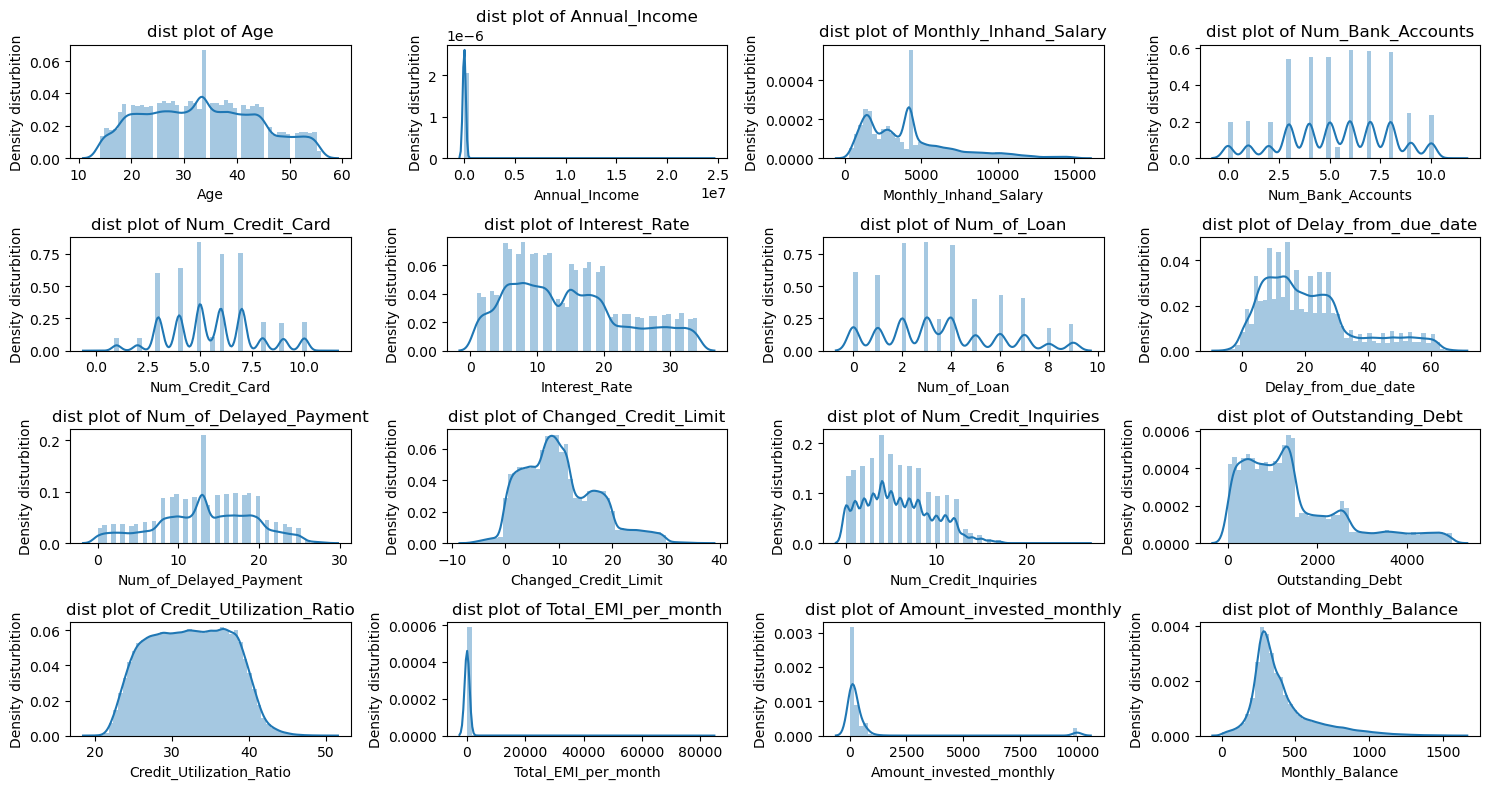

In [168]:
t=1
for i in num:
    plt.subplot(4,4,t)
    sns.distplot(df[i]) 
    plt.xlabel(i) 
    plt.ylabel('Density disturbition') 
    plt.title(f'dist plot of {i}')
    t+=1
plt.tight_layout()
plt.show()

### Inference
* Monthly_Inhand_Salary the distribution is slightly right-skewed, with most individuals earning a moderate monthly salary.
* Num_Bank_Accounts the data is right-skewed, with most individuals having a smaller number of bank accounts.
* Delay_from_due_date the values are somewhat evenly distributed, with a slight peak around the central range.
* Num_Credit_Inquiries, Most individuals have a low number of credit inquiries, with a few outliers having a significantly higher count.
* Credit_Utilization_Ratio the utilization ratio is evenly spread across the dataset.
* Total_EMI_per_month, Right-skewed distribution, showing that most individuals pay a lower amount in EMIs.EMIs.

#### BOX PLOT

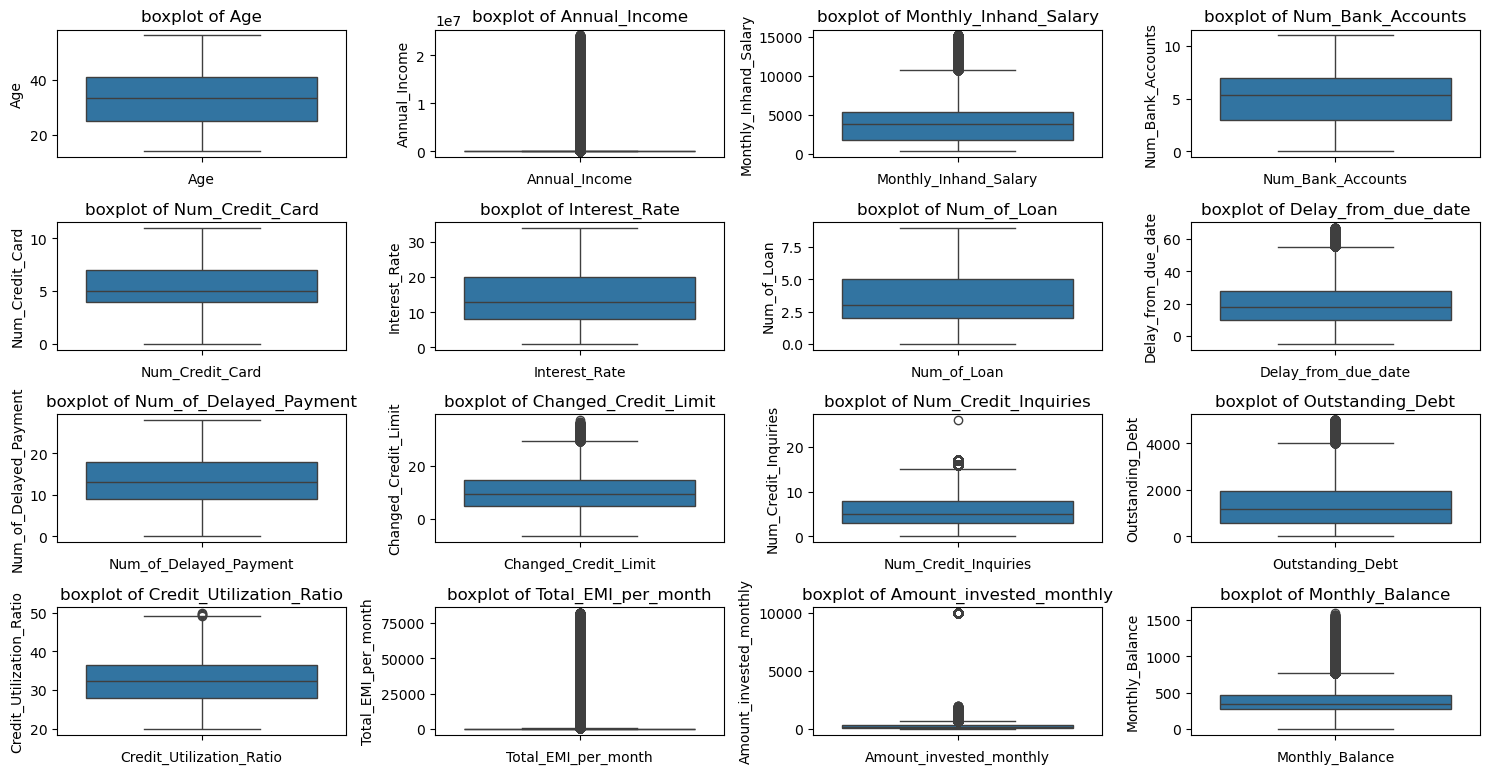

In [169]:
t=1
for i in num:
    plt.subplot(4,4,t)
    sns.boxplot(df[i]) 
    plt.xlabel(i) 
    plt.title(f'boxplot of {i}')
    t+=1
plt.tight_layout()
plt.show()

### Inference
* NUM_OF_LOAN,Interest_rate has least outliers.
* Total_emi_per_month,Monthly_balance, Annual_Income,Monthly_Inhand_Salary, Changed_Credit_Limit,Outstanding_debt has more outliers.

## Categorical Visualization

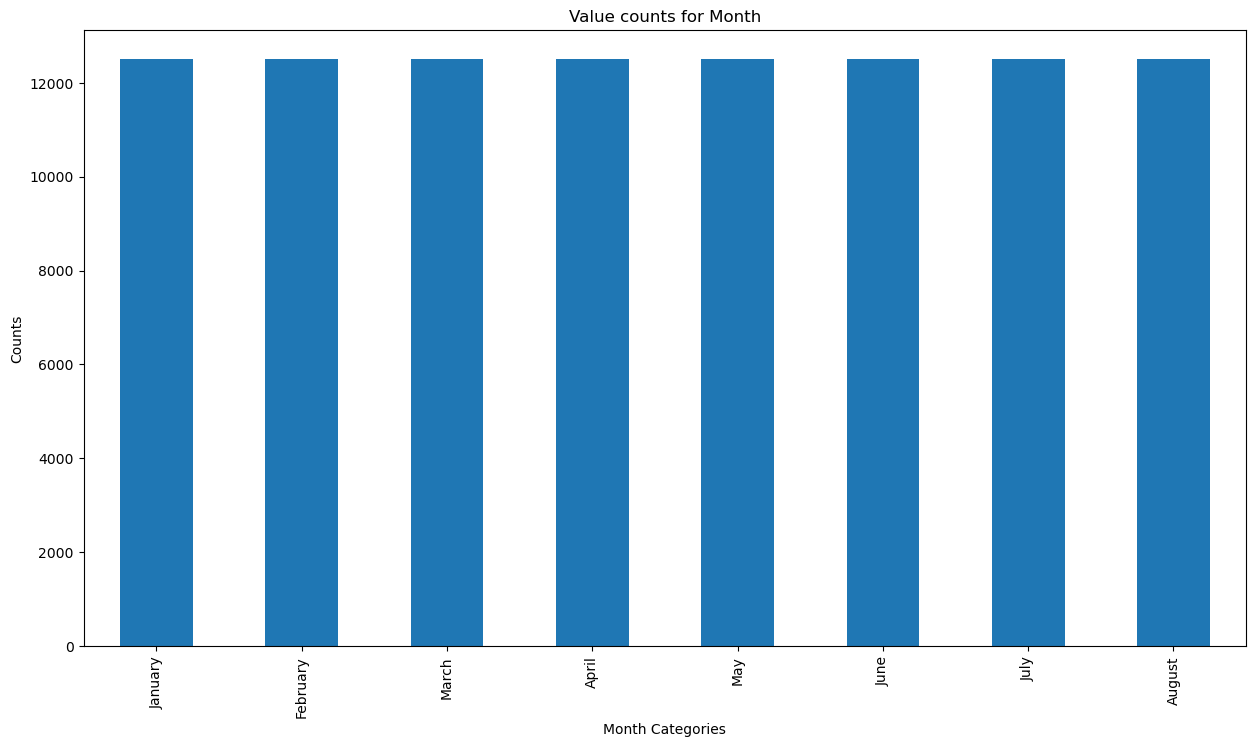

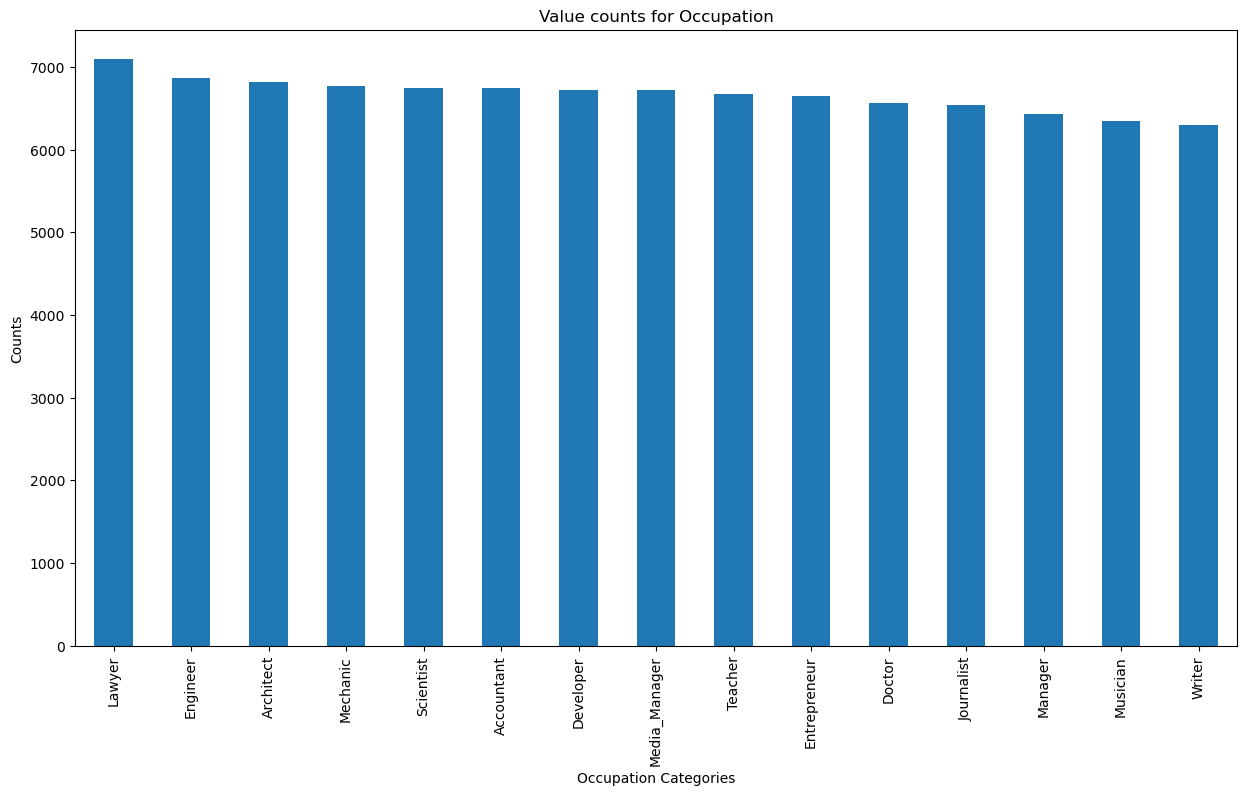

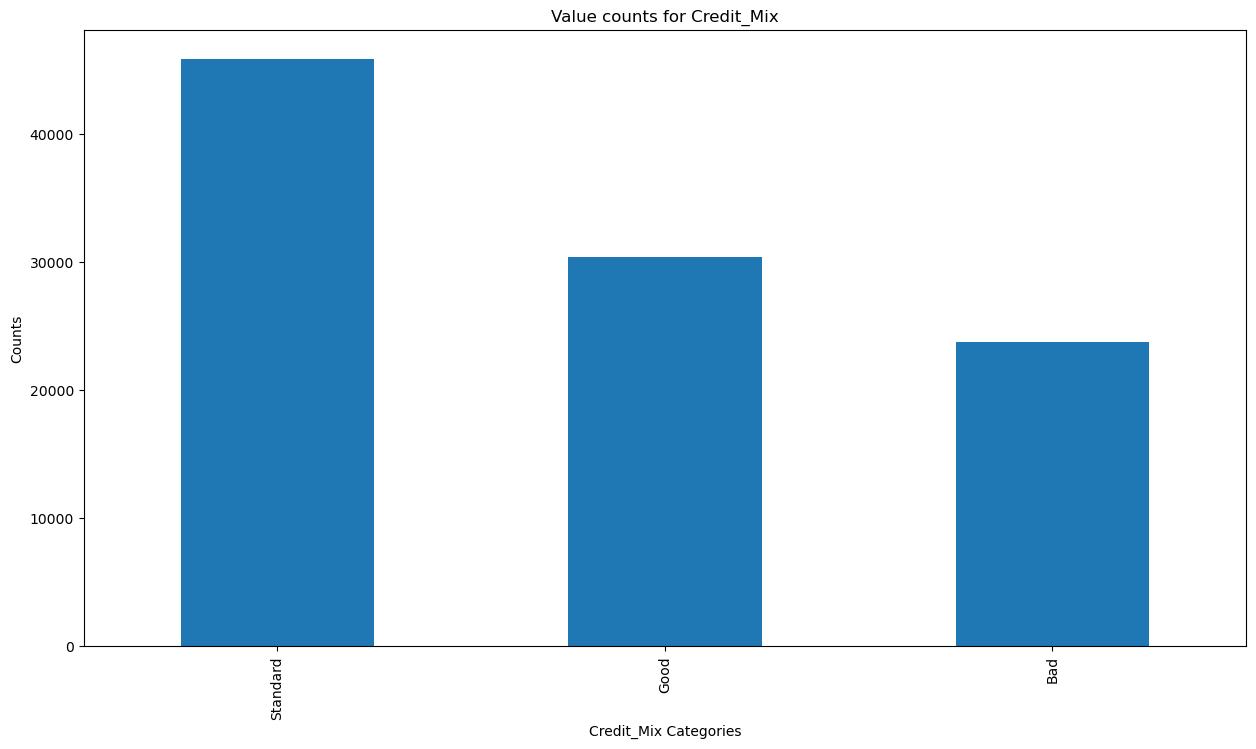

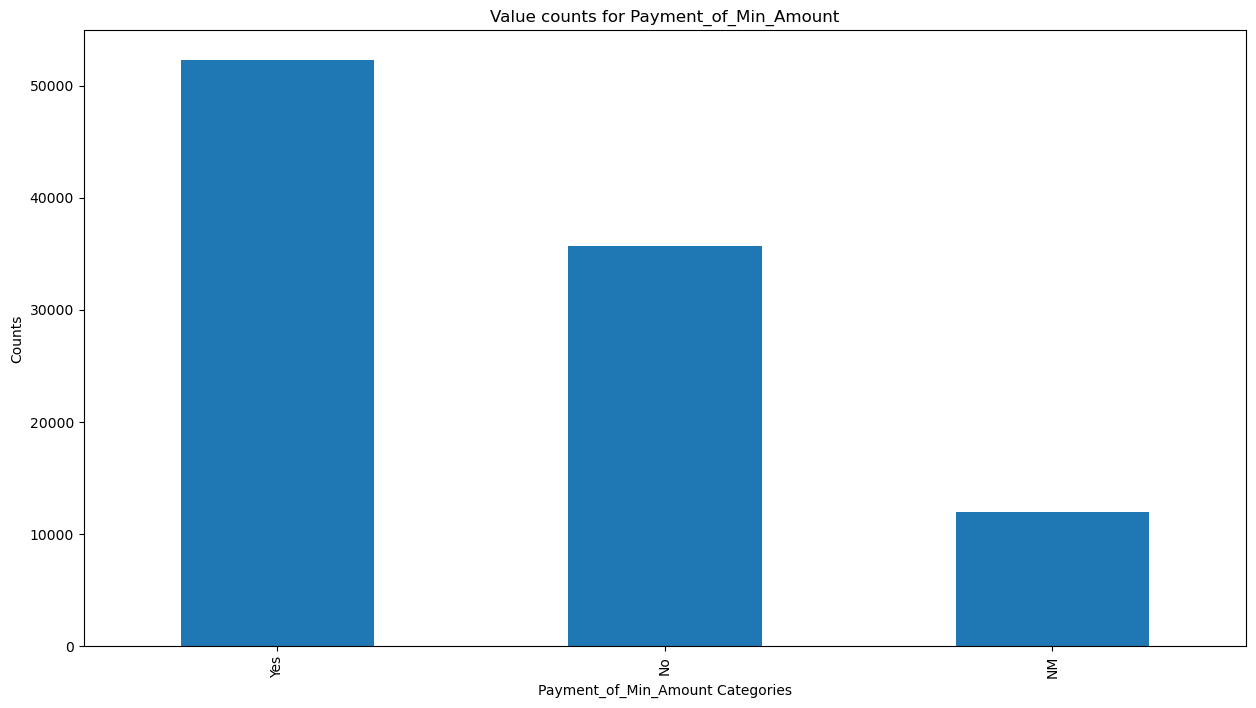

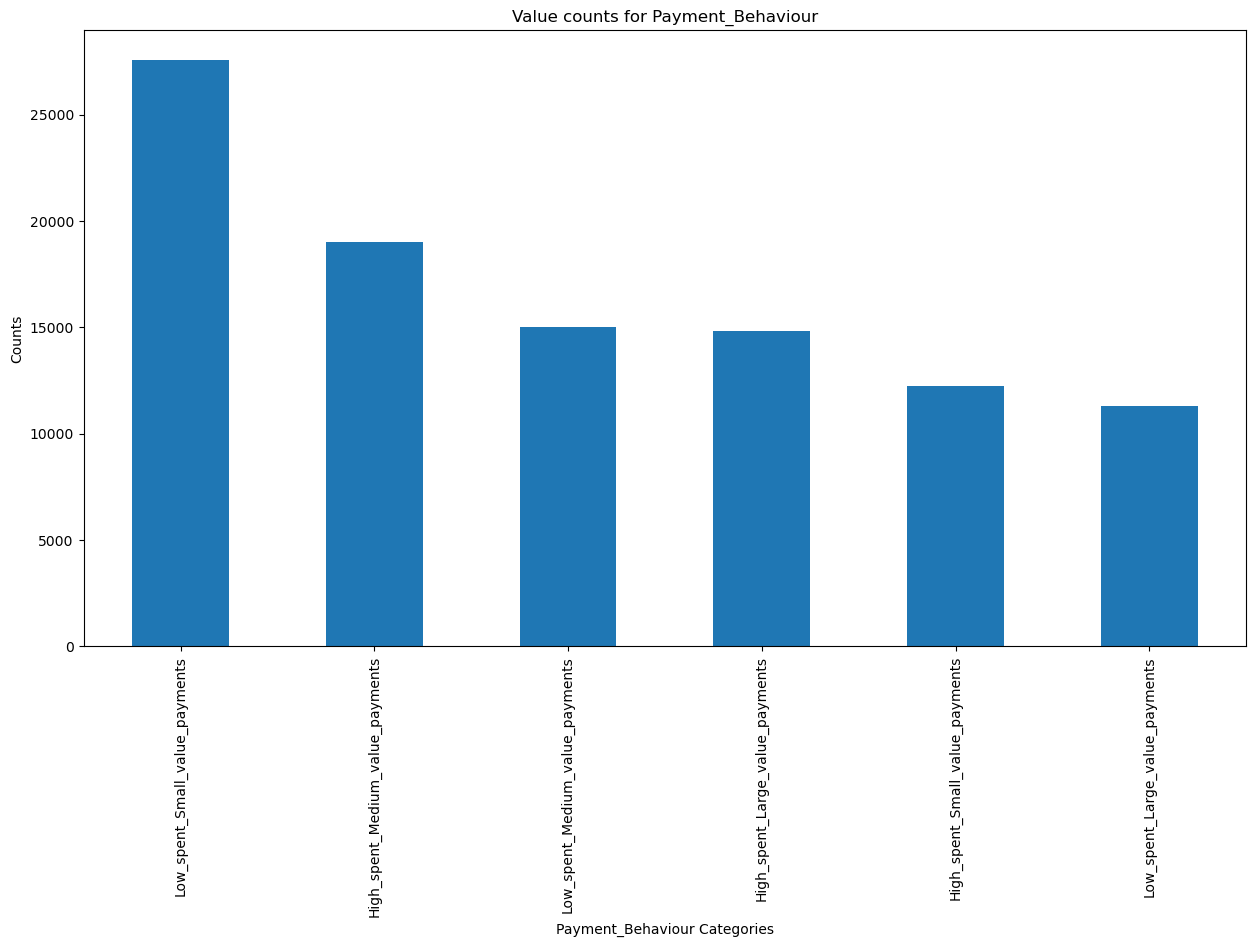

In [170]:
t = 1
for i in cat:
    if i != "Type_of_Loan":  
        df[i].value_counts().plot(kind='bar')
        plt.title(f'Value counts for {i}')
        plt.xlabel(f'{i} Categories')
        plt.ylabel('Counts')
        plt.show()

### Inference
* The dataset appears to have an equal number of data points for each month. This suggests that the data collection process was likely not biased towards any specific month.
* The "Standard" credit mix category is the most frequent, followed by "Good" and then "Bad." This indicates that a majority of the individuals in the dataset have a standard credit mix, suggesting a healthy financial profile.
*The dataset shows that "Lawyer" is the most common occupation, followed by "Engineer" and "Architect." On the other hand, "Writer" is the least common occupation represented in the data. This information could be valuable for understanding the demographics of the dataset and potentially tailoring analyses or interventions accordingly.

## Bivariate Analysis¶

### Num vs Num

In [171]:
df[num].corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.006409,0.080861,-0.186351,-0.143719,-0.211312,-0.205092,-0.171237,-0.173461,-0.149410,-0.242677,-0.199526,0.024735,0.001062,0.005407,0.113079
Annual_Income,0.006409,1.000000,0.028198,-0.008510,-0.002523,-0.006490,-0.005312,-0.010631,-0.006463,0.000083,-0.009085,-0.003706,0.010316,-0.000248,-0.005213,0.020000
Monthly_Inhand_Salary,0.080861,0.028198,1.000000,-0.257949,-0.198735,-0.275336,-0.229559,-0.230526,-0.251339,-0.157003,-0.253477,-0.248724,0.159586,0.006694,0.055432,0.639299
Num_Bank_Accounts,-0.186351,-0.008510,-0.257949,1.000000,0.435311,0.574370,0.459954,0.556924,0.573643,0.318398,0.505180,0.503653,-0.071308,-0.006097,-0.018960,-0.292955
Num_Credit_Card,-0.143719,-0.002523,-0.198735,0.435311,1.000000,0.486838,0.404900,0.474000,0.400896,0.242014,0.445760,0.485337,-0.054788,-0.006339,-0.011418,-0.231765
Interest_Rate,-0.211312,-0.006490,-0.275336,0.574370,0.486838,1.000000,0.542090,0.582802,0.542445,0.351268,0.614548,0.623026,-0.075494,-0.004837,-0.018465,-0.320816
Num_of_Loan,-0.205092,-0.005312,-0.229559,0.459954,0.404900,0.542090,1.000000,0.490799,0.447049,0.351349,0.541440,0.625691,-0.098335,-0.000687,-0.014222,-0.420513
Delay_from_due_date,-0.171237,-0.010631,-0.230526,0.556924,0.474000,0.582802,0.490799,1.000000,0.520474,0.284409,0.530026,0.571713,-0.063796,-0.003889,-0.012278,-0.277039
Num_of_Delayed_Payment,-0.173461,-0.006463,-0.251339,0.573643,0.400896,0.542445,0.447049,0.520474,1.000000,0.301758,0.471793,0.484603,-0.070401,-0.004198,-0.022991,-0.288248
Changed_Credit_Limit,-0.149410,0.000083,-0.157003,0.318398,0.242014,0.351268,0.351349,0.284409,0.301758,1.000000,0.361491,0.443653,-0.048217,-0.001103,-0.010902,-0.196397


### Inference
* Higher salary correlates with higher monthly balance.
* People with more loans tend to have higher outstanding debts and may also face delays in payments.
* Credit inquiries are weakly associated with lower credit utilization, but this relationship isn’t strong enough to draw major conclusions.
* Interest rates are strongly correlated with higher outstanding debt, showing that debt can become more expensive as interest rates increase.
* Amount invested monthly doesn't seem to correlate with monthly balance, suggesting investments may not impact liquidity as much.
* Age negatively correlates with credit-related factors like Num_Bank_Accounts, Num_of_Loan, and Num_Credit_Card this suggests that younger individuals tend to have more bank accounts and loans than older individuals.

In [172]:
df[num].cov()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,112.757839,9.729760e+04,2.520258e+03,-5.097124,-3.119523,-19.410394,-5.212651,-27.020478,-11.082004,-10.916457,-9.775919,-2.447395e+03,1.343980,9.362438e+01,1.146714e+02,2.553162e+02
Annual_Income,97297.597982,2.043808e+12,1.183249e+08,-31339.660279,-7371.686151,-80256.777196,-18176.148143,-225838.904259,-55593.812897,811.986279,-49274.592033,-6.119646e+06,75465.993162,-2.946018e+06,-1.488446e+07,6.079584e+06
Monthly_Inhand_Salary,2520.257993,1.183249e+08,8.615261e+06,-1950.247907,-1192.359767,-6990.907009,-1612.738298,-10054.875064,-4438.504887,-3170.819844,-2822.462028,-8.433009e+05,2396.812963,1.632087e+05,3.249239e+05,3.989876e+05
Num_Bank_Accounts,-5.097124,-3.133966e+04,-1.950248e+03,6.635017,2.292032,12.798214,2.835767,21.317616,8.890074,5.643127,4.936533,1.498591e+03,-0.939869,-1.304401e+02,-9.753056e+01,-1.604514e+02
Num_Credit_Card,-3.119523,-7.371686e+03,-1.192360e+03,2.292032,4.178299,8.608362,1.980991,14.397915,4.930314,3.403830,3.456656,1.145972e+03,-0.573045,-1.076185e+02,-4.661083e+01,-1.007322e+02
Interest_Rate,-19.410394,-8.025678e+04,-6.990907e+03,12.798214,8.608362,74.829545,11.223900,74.916887,28.231574,20.907534,20.167296,6.225484e+03,-3.341594,-3.475151e+02,-3.189786e+02,-5.900834e+02
Num_of_Loan,-5.212651,-1.817615e+04,-1.612738e+03,2.835767,1.980991,11.223900,5.728897,17.456655,6.437736,5.786319,4.916329,1.729921e+03,-1.204337,-1.366275e+01,-6.797839e+01,-2.140109e+02
Delay_from_due_date,-27.020478,-2.258389e+05,-1.005488e+04,21.317616,14.397915,74.916887,17.456655,220.822698,46.533307,29.079918,29.879521,9.813644e+03,-4.850885,-4.800099e+02,-3.643777e+02,-8.753561e+02
Num_of_Delayed_Payment,-11.082004,-5.559381e+04,-4.438505e+03,8.890074,4.930314,28.231574,6.437736,46.533307,36.198072,12.491934,10.768345,3.367900e+03,-2.167344,-2.097789e+02,-2.762403e+02,-3.687490e+02
Changed_Credit_Limit,-10.916457,8.119863e+02,-3.170820e+03,5.643127,3.403830,20.907534,5.786319,29.079918,12.491934,47.343041,9.435830,3.526159e+03,-1.697596,-6.304910e+01,-1.497968e+02,-2.873317e+02


### Inference
* Individuals should focus on managing their debts and payments promptly, as delays and high outstanding debts can lead to more financial instability and increased interest payments.
* Salary and Balance Management: Higher monthly salaries correlate with better balance management, so individuals may benefit from prioritizing savings and maintaining a stable income flow.
* Credit Behavior: Be mindful of credit usage and inquiries, as frequent credit checks and high credit card usage can affect credit scores and credit limits.
* Investment Focus: Investments are not highly correlated with monthly balance, but regular investing could be a strategy for long-term wealth building, separate from day-to-day financial health.
    

##### scatterplot

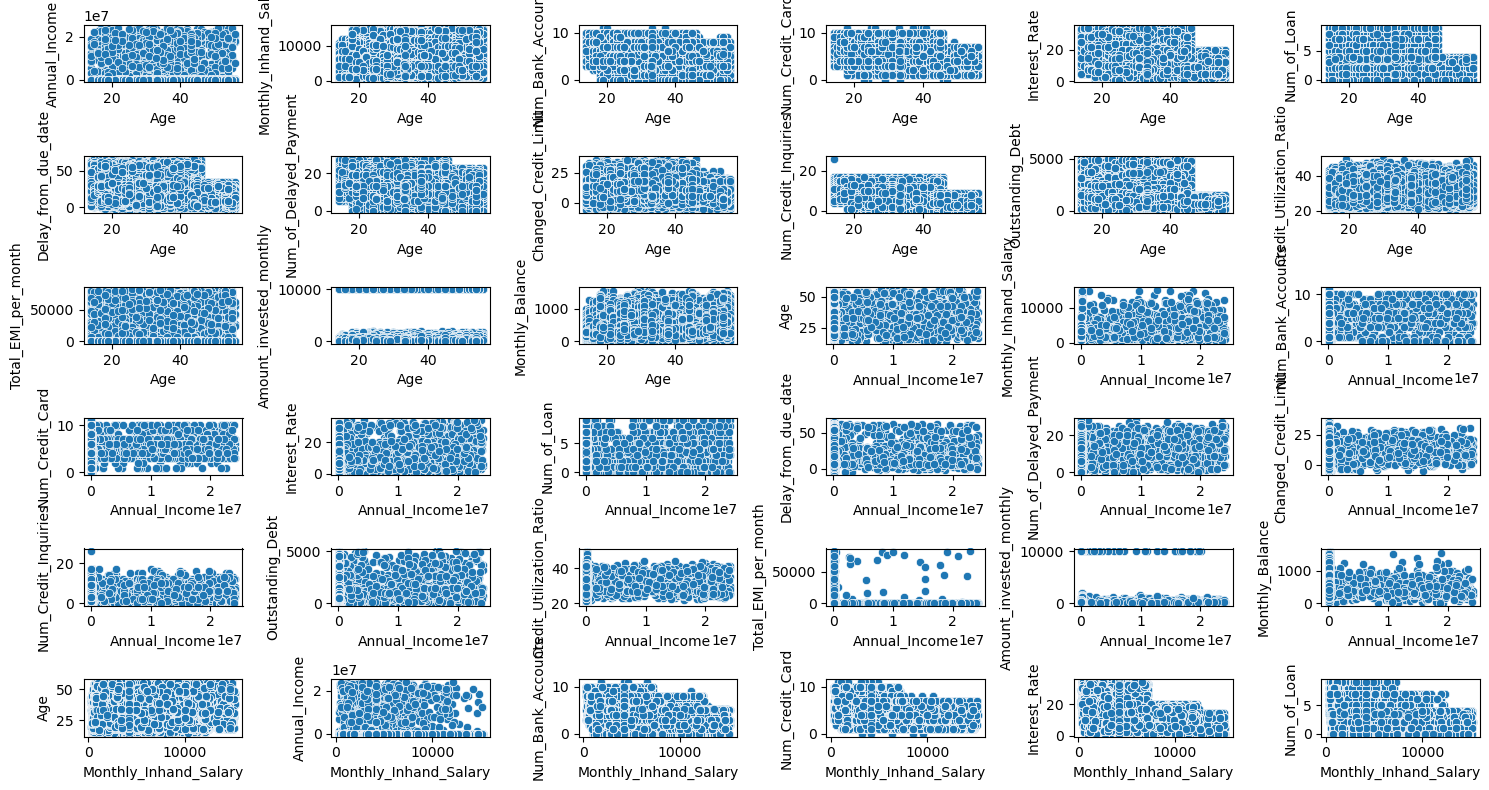

In [173]:
t = 1
max_plots = 36

for i in num:
    for j in num:
        if i != j:
            if t <= max_plots:
                plt.subplot(6, 6, t)
                sns.scatterplot(x=df[i], y=df[j])
                t += 1

plt.tight_layout()
plt.show()

### Inference
* The scatter plots indicate that most variables do not show a clear linear correlation with each other. The points are widely spread, suggesting weak or no direct relationships.
* Annual income appears to be concentrated at certain discrete values, possibly due to categorization or salary bands.
*  Certain variables (e.g., interest rates, outstanding debt) show outliers or sparse distributions, which might require further investigation or data preprocessing before model training
  
* The age variable does not exhibit a clear trend with most financial metrics, suggesting financial behavior is not strongly dependent on age alone
  
* Some dense clustering is seen for monthly salary and annual income, implying specific salary bands or common earning groups in the dataset
  * 	Some plots suggest that delays in payments might have a weak but scattered relationship with credit card utilization or outstandig ebtg


##### Barplot

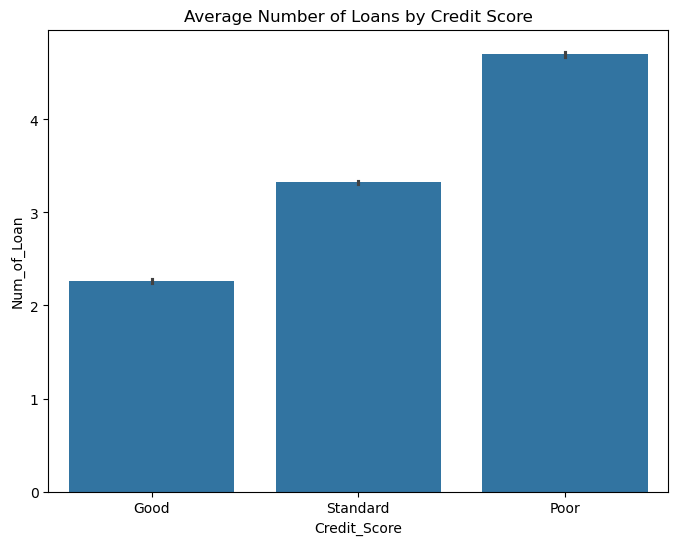

In [174]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Credit_Score', y='Num_of_Loan', data=df, estimator='mean')
plt.title('Average Number of Loans by Credit Score')
plt.show()


#### Inferences:

* Poor credit scores are linked to a higher number of loans, indicating repayment difficulties.
* Standard credit scores show a moderate loan count, reflecting manageable but risky borrowing.
* Good credit scores have the fewest loans, suggesting better debt management.
* The number of loans is a strong indicator of credit risk, making it important for classification.

**Histplot**

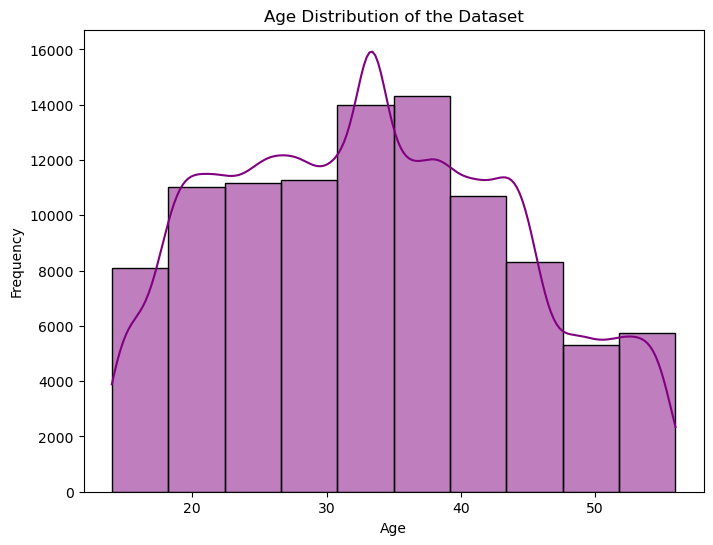

In [175]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=10, kde=True, color='purple')
plt.title('Age Distribution of the Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Inferences:
* The dataset's age distribution is roughly spread between 18 and 55.
* The most frequent age group is around 30-35.
* The distribution appears bimodal, with peaks around 20-25 and 30-35.
* The frequency declines for ages above 50.
* The KDE curve indicates variations in density, suggesting multiple age segments.

**pie chart**

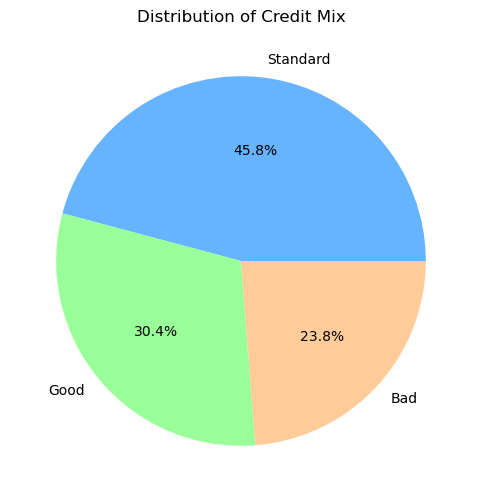

In [176]:
plt.figure(figsize=(6, 6))
df['Credit_Mix'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Credit Mix')
plt.ylabel('')
plt.show()

#### Inferences:
* The majority (45.8%) of individuals have a Standard credit mix.
* A significant portion (30.4%) falls under the Good credit mix category.
* Bad credit mix accounts for 23.8%, the lowest among the three categories.
* The presence of Good and Standard credit mixes suggests a relatively balanced distribution, but a notable percentage still has a poor credit mix.
* The data indicates that most individuals have a manageable credit mix, though a portion may require financial improvement strategies.

**Hist plot**

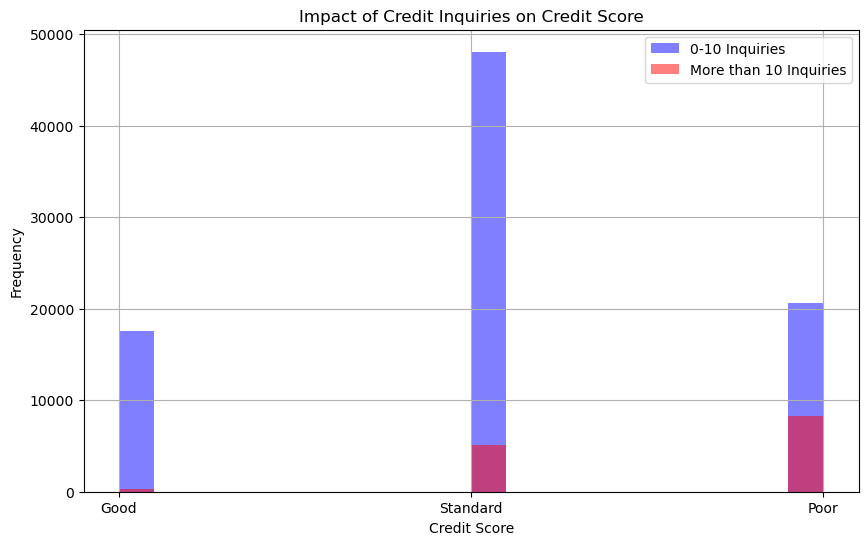

In [177]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['Num_Credit_Inquiries'] <= 10]['Credit_Score'], bins=20, alpha=0.5, label='0-10 Inquiries', color='blue')
plt.hist(df[df['Num_Credit_Inquiries'] > 10]['Credit_Score'], bins=20, alpha=0.5, label='More than 10 Inquiries', color='red')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Impact of Credit Inquiries on Credit Score')
plt.legend()
plt.grid(True)
plt.show()

#### Inferences:
* Most individuals fall under the Standard credit score category, with the highest frequency of 0-10 credit inquiries.
* The Poor credit score category has a relatively higher proportion of individuals with more than 10 inquiries, indicating a potential negative impact of excessive inquiries on credit scores.
* The Good credit score category has the least number of individuals and very few with more than 10 inquiries, suggesting that those with fewer inquiries are more likely to maintain a good credit score.
* Higher credit inquiries appear to be associated with lower credit scores, as seen in the Poor category having more red bars compared to Good and Standard.
* The Standard category has the largest population, but only a small fraction of them have more than 10 inquiries.

**Histplot**

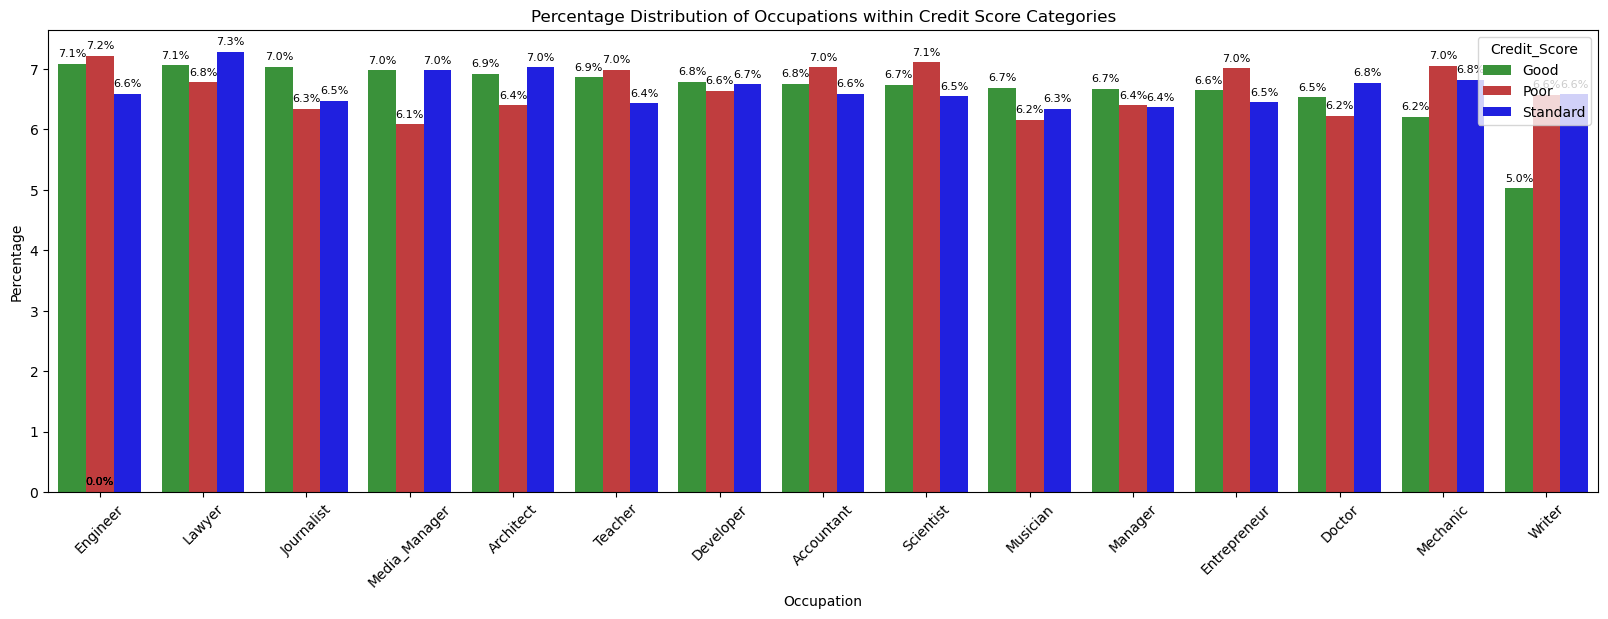

In [178]:


colors = ["#2ca02c", "#d62728", 'blue']

# Calculate the percentage distribution of Occupation within each Credit_Score category
occupation_percent = (
    df.groupby("Credit_Score")["Occupation"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)

plt.figure(figsize=(20, 6))

# Plot percentage distribution
sns.barplot(data=occupation_percent, x="Occupation", y="Percentage", hue="Credit_Score", 
            palette=colors)

plt.title("Percentage Distribution of Occupations within Credit Score Categories")
plt.xlabel("Occupation")
plt.ylabel("Percentage")

# Display percentage values on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.xticks(rotation=45)
plt.show()


#### Inferences:
* Across all occupations, the Standard credit score category has the highest count, followed by Poor, and then Good.
* Lawyers have the highest number of individuals in the Standard category, suggesting that this profession may have a moderate credit score distribution.
* Scientists, Teachers, Engineers, and Developers show similar credit score distributions, with Standard being the most common and Good being the least.
* Writers have the lowest count in the Good category, which could indicate financial instability or irregular income affecting credit scores.
* The general trend suggests that most occupations have a higher proportion of individuals with Standard and Poor credit scores than Good credit scores, indicating potential financial challenges across various professions.


##### countplot

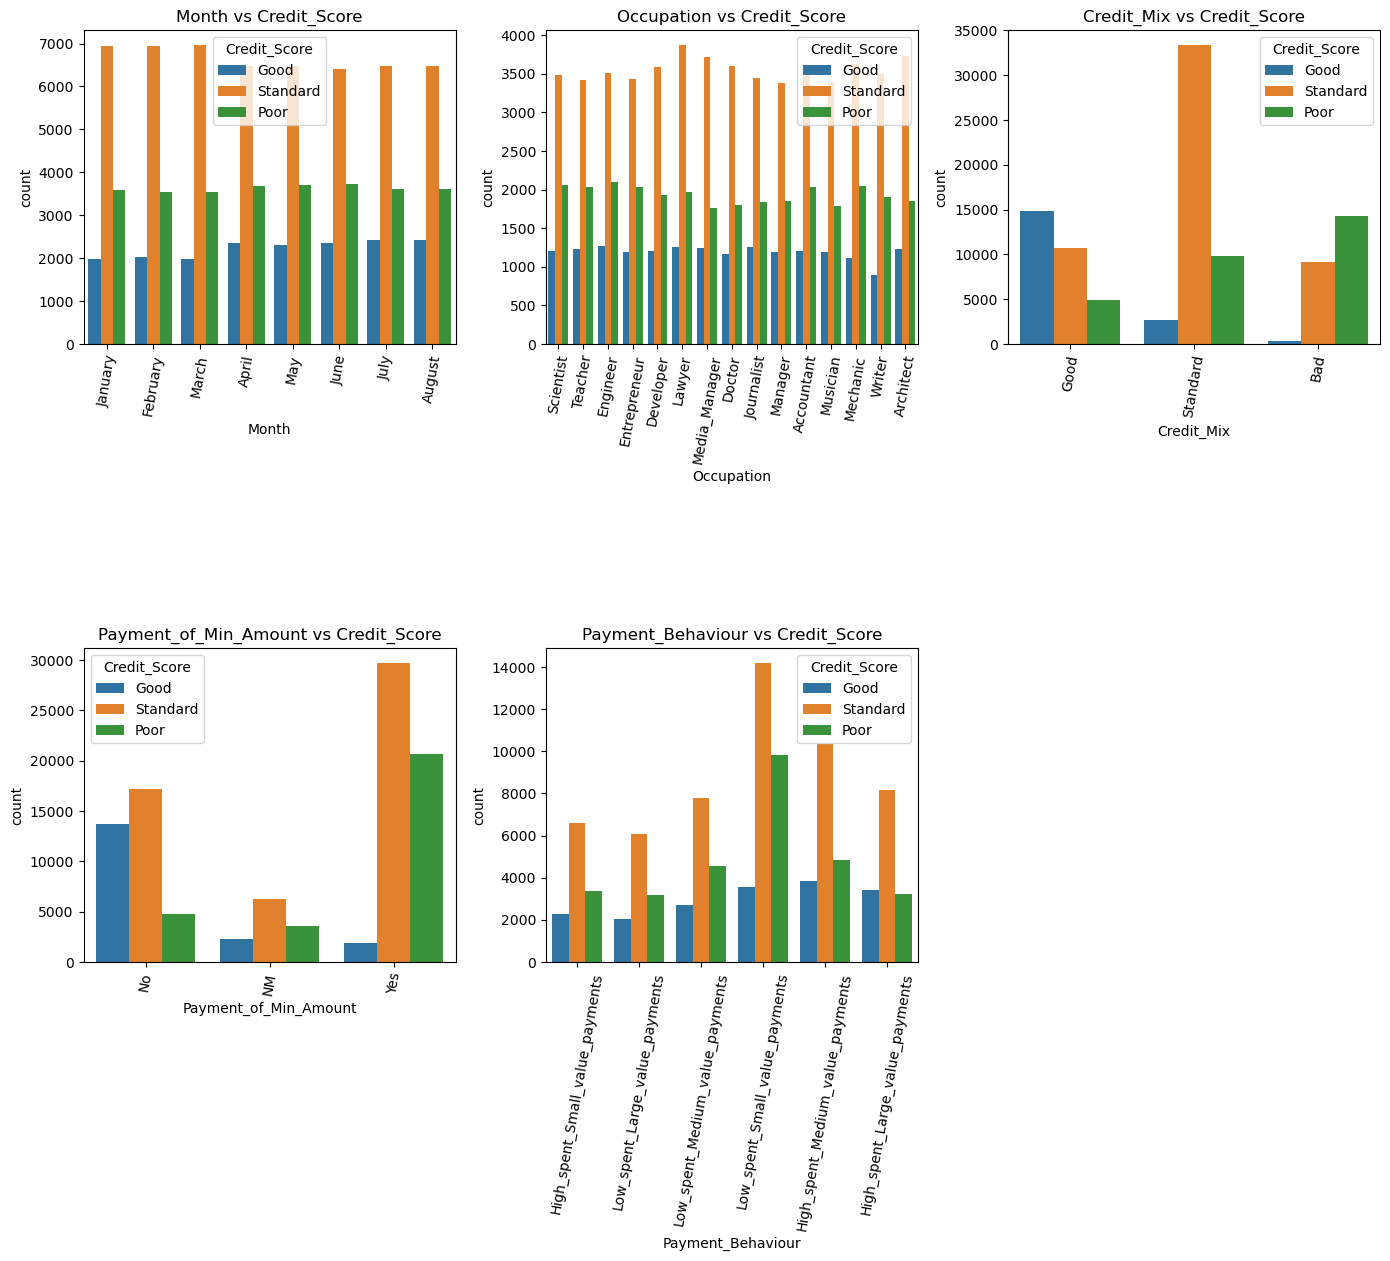

In [179]:
categorical_features = df.select_dtypes(include='object').columns.tolist()

categorical_features = [col for col in categorical_features if col not in ['Credit_Score', 'Type_of_Loan']]

plt.figure(figsize=(14, 16))

for i, col in enumerate(categorical_features[:9], 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='Credit_Score', data=df)
    plt.title(f'{col} vs Credit_Score')
    plt.xticks(rotation=80)

plt.tight_layout()
plt.show()


#### Inferences

* Month vs Credit Score: Standard credit scores dominate across all months, with Good and Poor scores showing consistent but lower counts.
* Occupation vs Credit Score: Standard credit scores are highest across occupations, notably for Lawyers and Media Managers.
* Credit Mix vs Credit Score: A Standard credit mix shows the highest count, while Poor scores are more common with a Bad credit mix.
* Payment of Min Amount vs Credit Score: Most individuals with Standard and Poor scores pay the minimum amount, whereas many with Good scores do not.
* Payment Behavior vs Credit Score: Low spent, small value payments are common for Standard and Poor scores, while High spent, large value payments show more Good scores.

**countplot**

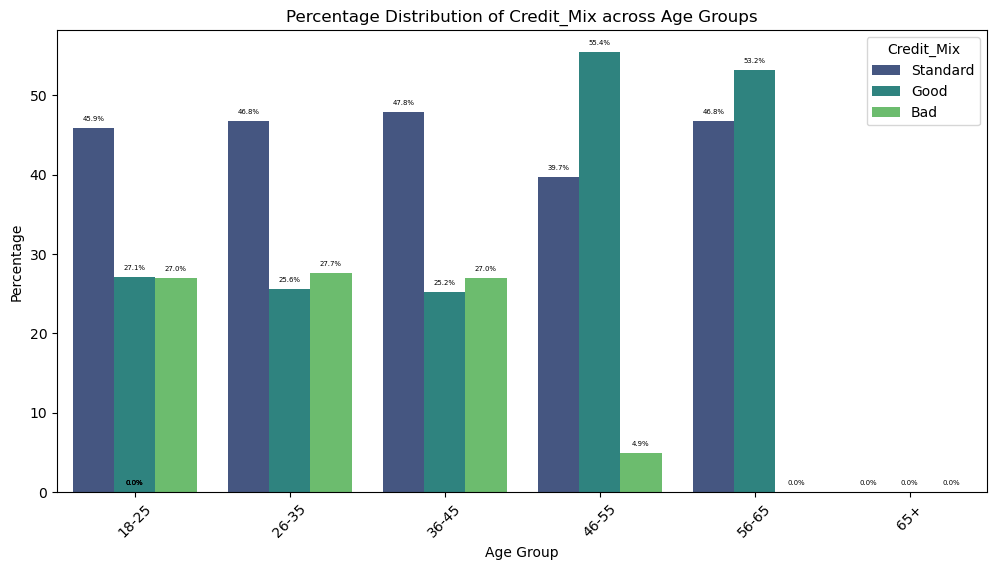

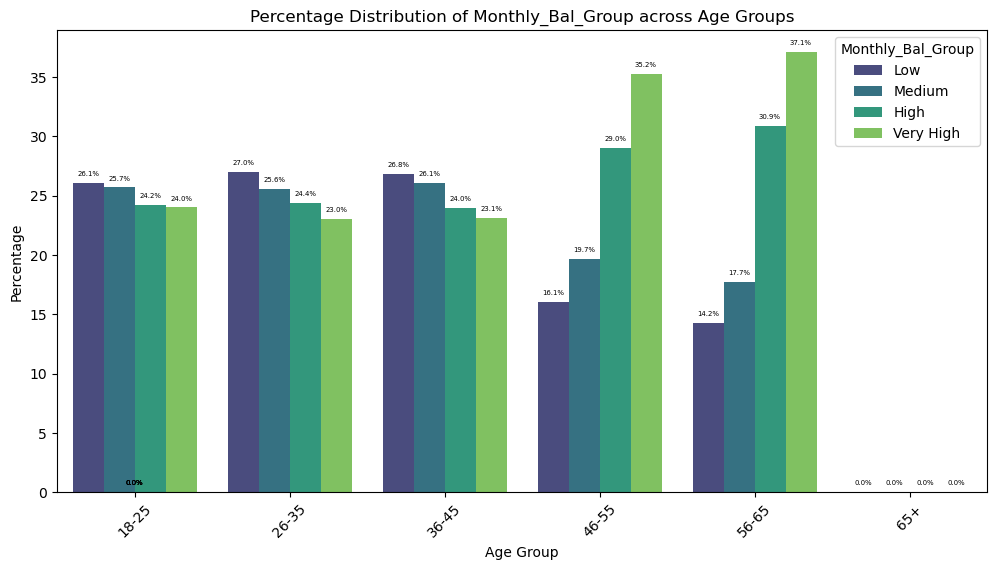

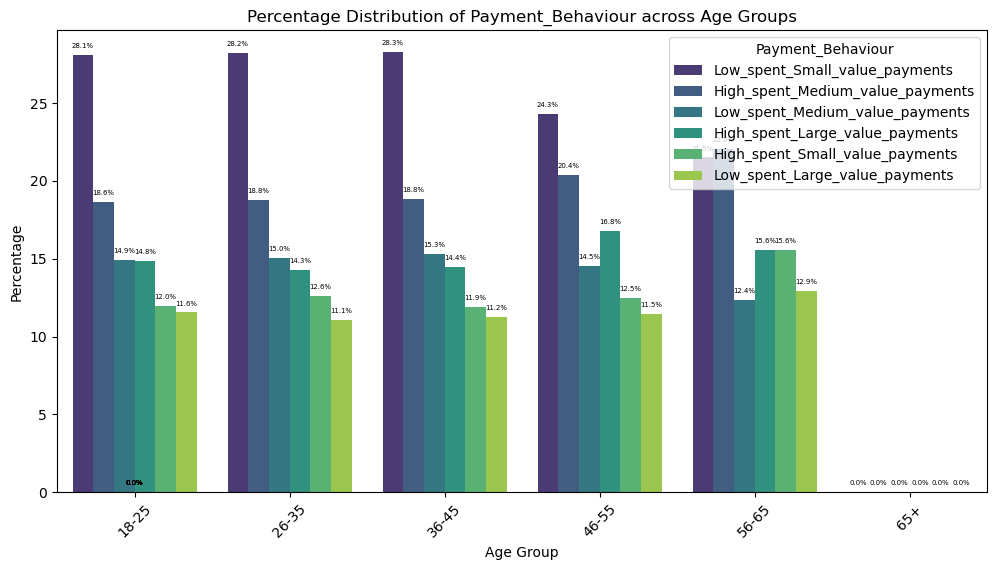

In [182]:


relevant_categorical_cols = ["Credit_Mix", "Monthly_Bal_Group", "Payment_Behaviour"]

# Loop through relevant categorical columns and plot percentage distribution across Age Groups
for col in relevant_categorical_cols:
    plt.figure(figsize=(12, 6))
    
    # Calculate the percentage distribution of each category within Age Groups
    percentage_data = (
        df.groupby("Age_Group")[col]
        .value_counts(normalize=True)
        .mul(100)
        .rename("Percentage")
        .reset_index()
    )
    
    # Plotting the percentage data
    sns.barplot(data=percentage_data, x="Age_Group", y="Percentage", hue=col, palette="viridis")
    
    plt.title(f"Percentage Distribution of {col} across Age Groups")
    plt.xticks(rotation=45)
    plt.ylabel("Percentage")
    plt.xlabel("Age Group")
    
    # Display percentage values on bars
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.1f}%', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='baseline', fontsize=5, color='black', 
                           xytext=(0, 5), textcoords='offset points')
    
    plt.show()



#### Inferences

* Even Monthly Balance Distribution: Unlike credit mix, balance groups are more evenly distributed across age groups.
* Decline in Older Age Groups: Monthly balance, like credit mix and payment behavior, drops significantly after 45.
* Higher Balances in 26-45 Age Groups: These groups have more "High" and "Very High" balances, aligning with their spending behavior.
* More Stability Than Credit Mix: Unlike the first image, balance distribution is not dominated by a single category.
* Low Financial Activity in Seniors: Consistently across all images, individuals aged 56+ show minimal financial engagement.

**barplot**

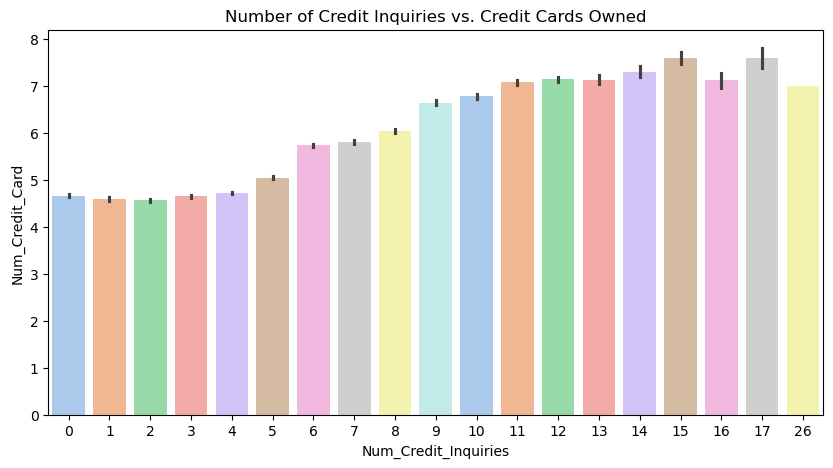

In [215]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="Num_Credit_Inquiries", y="Num_Credit_Card", palette="pastel")
plt.title("Number of Credit Inquiries vs. Credit Cards Owned")
plt.show()

#### Inferences
* More Inquiries → More Credit Cards: People with more credit inquiries tend to have more credit cards.
* Limit Around 14-15 Inquiries: After this point, the number of credit cards doesn’t increase much.
* Unusual Case at 26 Inquiries: Despite many inquiries, the number of credit cards is lower, possibly due to rejections.
* Too Many Inquiries Might Hurt: Lenders may see too many inquiries as risky, leading to fewer approvals.
* Active Borrowers: Those with more inquiries are likely applying for multiple credit options.

**countplot**

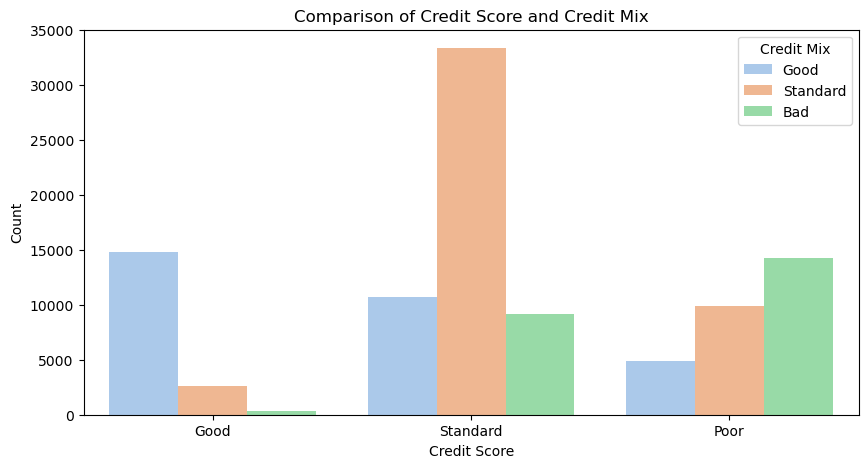

In [217]:

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Credit_Score", hue="Credit_Mix", palette="pastel")

plt.title("Comparison of Credit Score and Credit Mix")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.legend(title="Credit Mix")
plt.show()

#### Inferences
* Standard Credit Mix dominates Standard Credit Scores – Most individuals in the Standard credit score category have a Standard credit mix.
* Good Credit Mix aligns with Good Credit Scores – A higher count of individuals with a Good credit mix have a Good credit score.
* Bad Credit Mix is prevalent in Poor Credit Scores – A large proportion of people with a Bad credit mix fall into the Poor credit score category.
* Poor Credit Scores show a diverse credit mix – Unlike Standard scores, Poor scores have a more balanced distribution across Good, Standard, and Bad credit mixes.
* Credit Mix isn't the sole factor – Some individuals with a Good Credit Mix still have Standard or Poor credit scores, indicating other financial behaviors impact scores.

## Multivariate analysis

##### Barplot

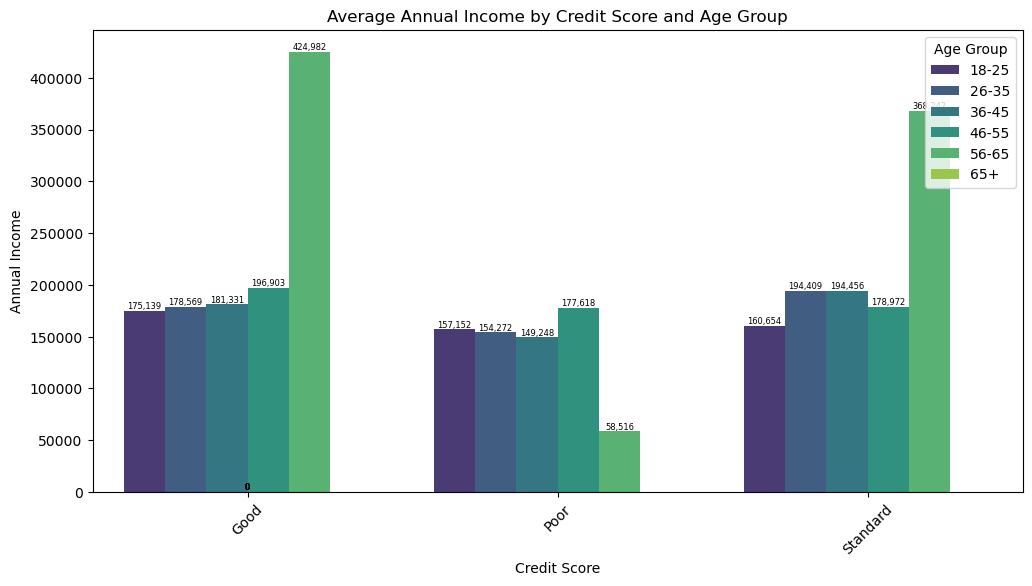

In [189]:
df_grouped = df.groupby(["Credit_Score", "Age_Group"])["Annual_Income"].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="Credit_Score", 
    y="Annual_Income", 
    hue="Age_Group", 
    data=df_grouped, 
    palette="viridis",
    dodge=True  
)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=6, color='black')

plt.title("Average Annual Income by Credit Score and Age Group")
plt.ylabel("Annual Income")
plt.xlabel("Credit Score")
plt.legend(title="Age Group", loc="upper right")
plt.xticks(rotation=45)

plt.show()

#### Inferences:
* Higher income is associated with a Good credit score, while lower income is linked to Poor credit scores.
* The 65+ age group shows the highest income for Good and Standard scores but experiences a significant drop for Poor scores.
* Income decreases as credit score worsens (Good → Standard → Poor), indicating financial stability affects creditworthiness.
* The income gap between credit score categories is more significant in older age groups, suggesting financial management improves with age.
* Poor credit scores are more common in lower-income groups, reinforcing the connection between income level and credit health.

##### Heatmap

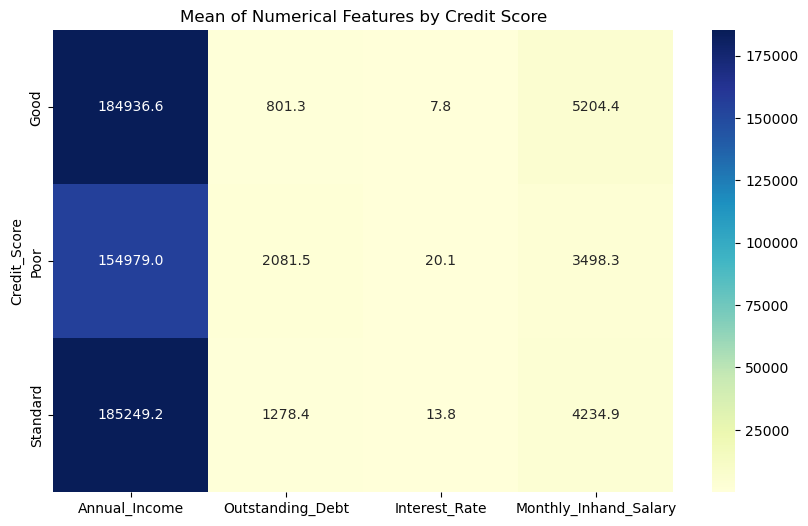

In [190]:
grouped_data = df.groupby('Credit_Score')[['Annual_Income', 'Outstanding_Debt', 'Interest_Rate', 'Monthly_Inhand_Salary']].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Mean of Numerical Features by Credit Score')
plt.show()

#### Inferences

* Annual Income: Individuals with Good and Standard credit scores have higher average annual incomes compared to those with Poor credit scores, indicating that higher income is associated with better credit scores.
* Outstanding Debt: Poor credit score individuals carry more outstanding debt, while those with Good credit scores have the least. Lower debt levels are linked to better credit scores.
* Interest Rate: Individuals with Poor credit scores face higher interest rates, whereas those with Good credit scores have lower rates. Lenders tend to charge higher rates to riskier borrowers.
* Monthly In-hand Salary: Good credit score individuals have higher monthly in-hand salaries compared to those with Poor credit scores. Higher disposable income supports better credit management.
* Better credit scores are associated with higher income, lower outstanding debt, lower interest rates, and higher monthly in-hand salaries.

##### Countplot

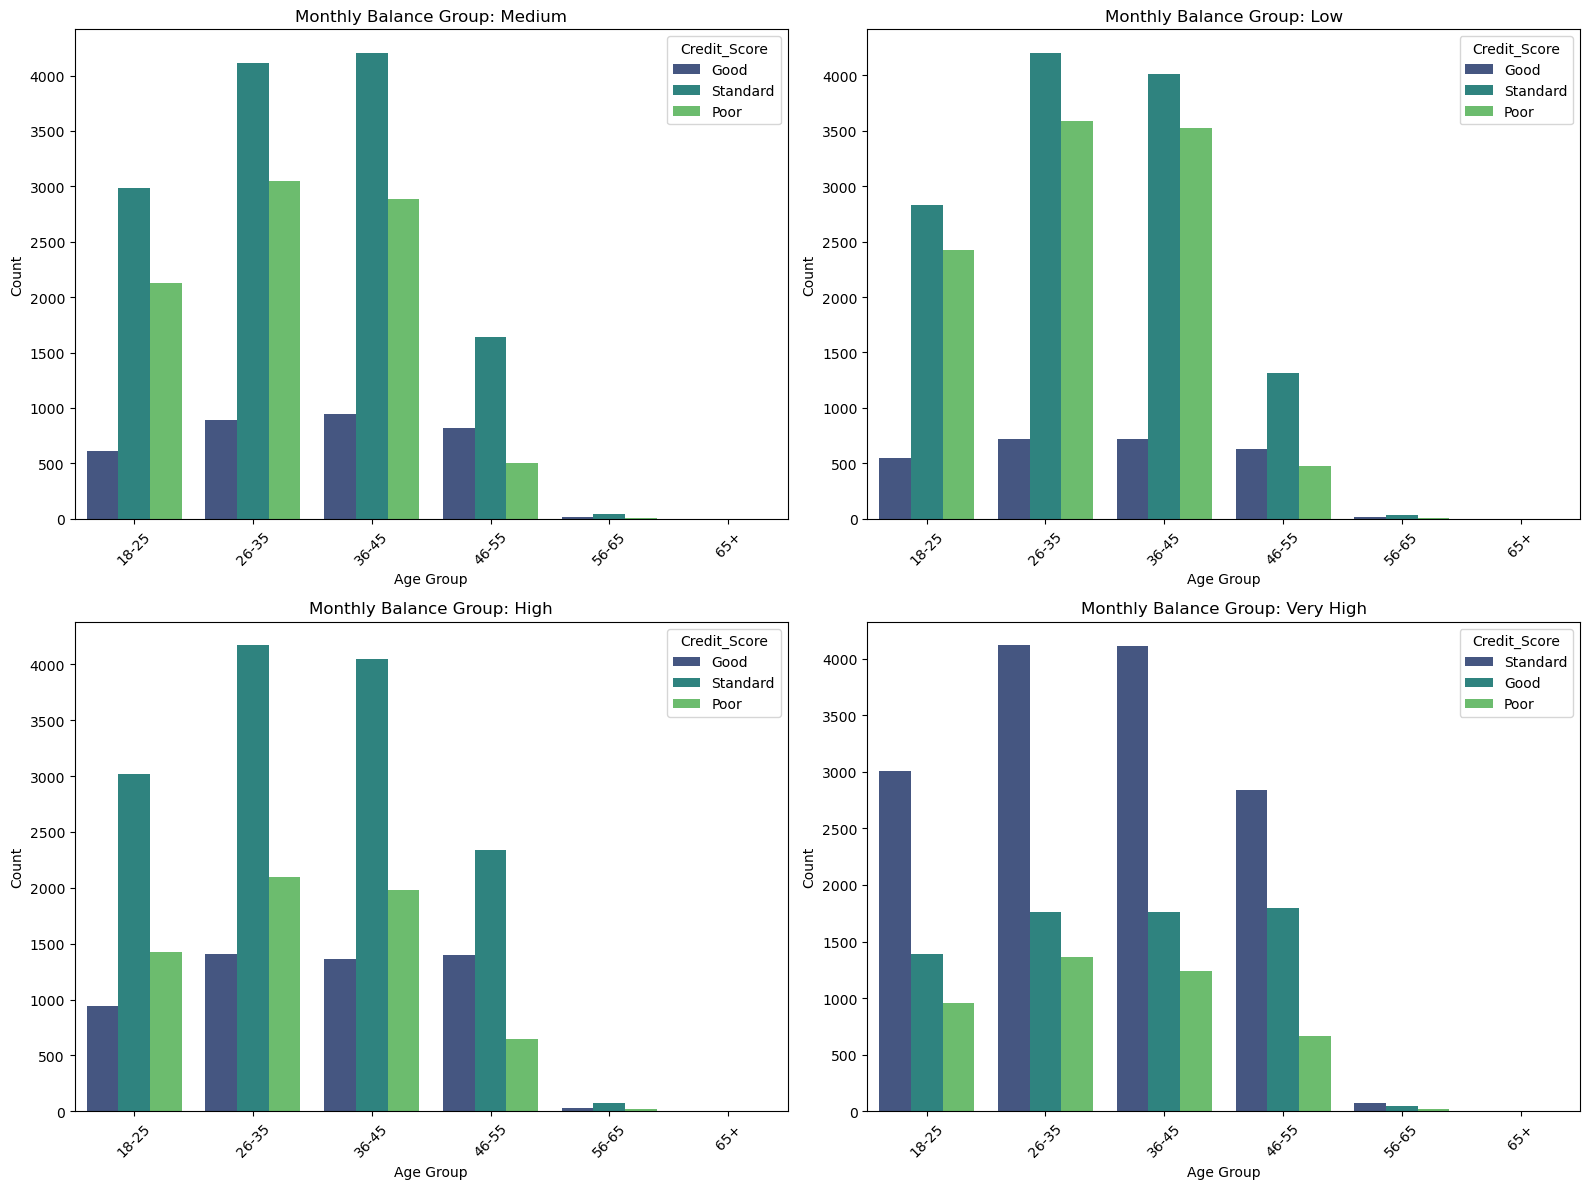

In [191]:
monthly_bal_groups = df["Monthly_Bal_Group"].unique()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Bigger figure size

axes = axes.flatten()

for i, group in enumerate(monthly_bal_groups):
    ax = axes[i] 
    sns.countplot(data=df[df["Monthly_Bal_Group"] == group], x="Age_Group", hue="Credit_Score", palette="viridis", ax=ax)
    ax.set_title(f"Monthly Balance Group: {group}")
    ax.set_xlabel("Age Group")
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

#### Inferences

* Higher Balances Correlate with Better Credit Scores – The "Very High" balance group has a significantly higher count of "Good" credit scores, while lower balance groups (Low/Medium) have more "Standard" and "Poor" scores.

* Dominance of Age 26-45 – The majority of credit users fall in the 26-45 age range across all balance groups, indicating that this age group is the most active in credit usage.

* Poor Credit Scores Decrease as Balance Increases – The "Poor" credit score category is more prominent in the Low/Medium balance groups, but its presence reduces in the High/Very High balance groups.

* Older Age Groups Show Minimal Credit Activity – Individuals aged 56+ have very low representation in all balance groups, suggesting that they are either using less credit or have settled financial situations.

* Low/Medium Balances Indicate Higher Credit Risk – These groups have a higher count of "Standard" and "Poor" credit scores, suggesting that lower balances are linked to higher financial risk.

##### Heatmap

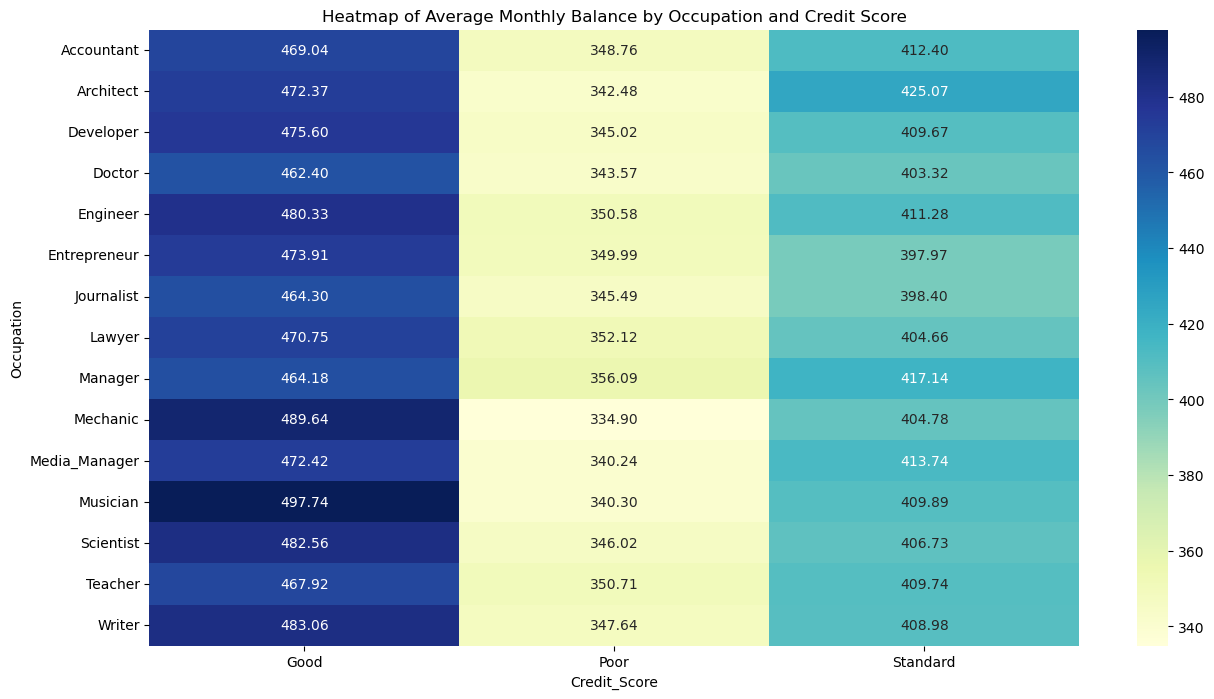

In [192]:
pivot_data = df.pivot_table(values='Monthly_Balance', index='Occupation', columns='Credit_Score', aggfunc='mean')

sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('Heatmap of Average Monthly Balance by Occupation and Credit Score')
plt.show()

#### Inference
* Good credit scores are linked to higher monthly balances, while Poor credit scores show lower balances across all occupations.
* Occupation affects balances, but the trend remains consistent—higher balances are associated with better credit scores regardless of the job.
* Roles like Musicians, Engineers, and Scientists maintain relatively higher balances even with lower credit scores.
* Managing monthly balances well is key to achieving a Good credit score, regardless of occupation.

##### Barplot

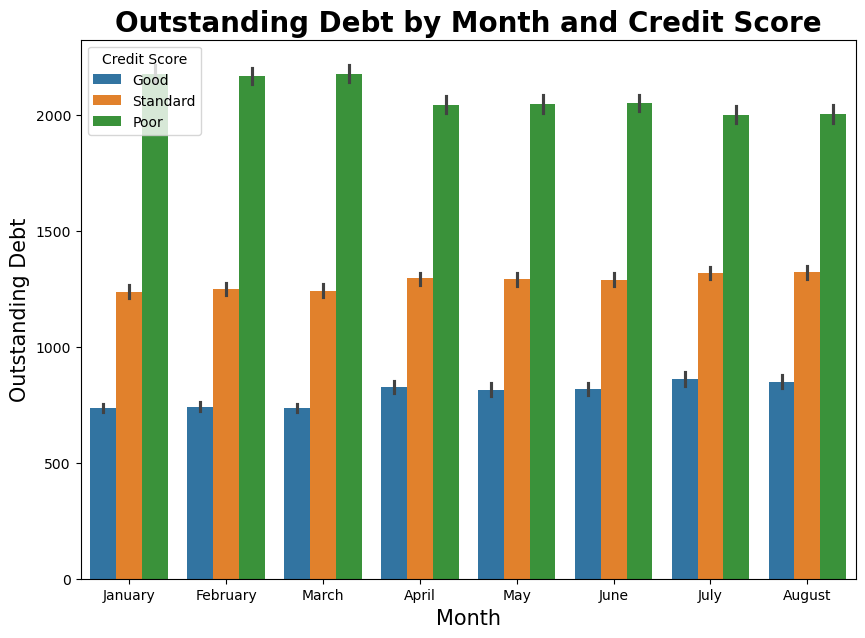

In [193]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x="Month", y="Outstanding_Debt", hue="Credit_Score")
plt.title("Outstanding Debt by Month and Credit Score", fontsize=20, fontweight="bold")
plt.xlabel("Month", fontsize=15)
plt.ylabel("Outstanding Debt", fontsize=15)
plt.legend(title='Credit Score')
plt.show()


### Inference
* Poor Credit Score: Consistently has the highest outstanding debt across all months, indicating a strong association between high debt levels and poor credit scores.
* Standard Credit Score: Shows moderate outstanding debt, suggesting a balanced debt level but still higher than individuals with good credit scores.
* Good Credit Score: Has the lowest outstanding debt, reflecting better debt management and repayment habits.
* Outstanding debt is a significant predictor for credit score classification. Higher outstanding debt correlates with poorer credit scores, making it a critical feature in your credit score classification model.

##### Barplot

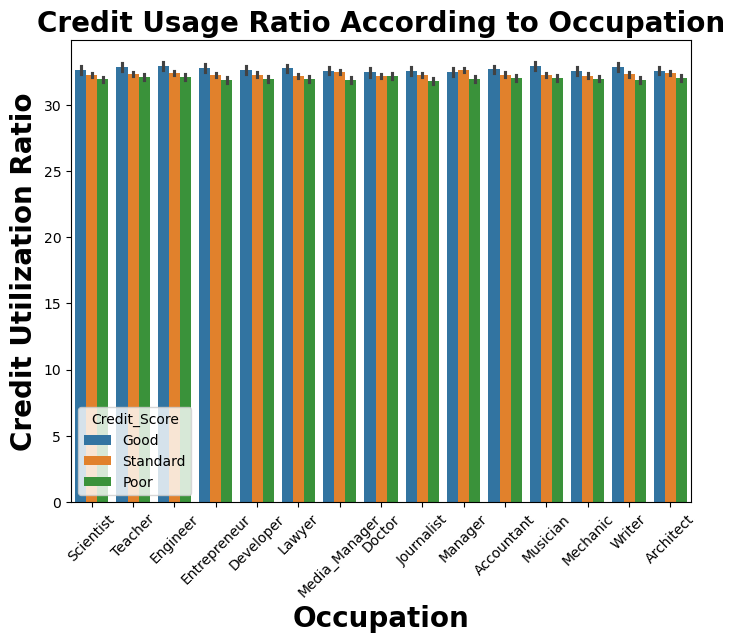

In [194]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="Occupation", y="Credit_Utilization_Ratio", hue="Credit_Score")
plt.xticks(rotation=45)
plt.title("Credit Usage Ratio According to Occupation", size=20, fontweight="bold")
plt.xlabel("Occupation", size=20, fontweight="bold")
plt.ylabel("Credit Utilization Ratio", size=20, fontweight="bold")
plt.show()

### Inference

* The credit utilization ratio is fairly consistent across all occupations, with slight variations.
* Individuals with good credit scores generally have a slightly higher credit utilization ratio compared to those with standard or poor credit scores across most occupations.
*  Occupations like Scientist, Engineer, and Lawyer show marginally higher credit utilization ratios, while occupations like Mechanic and Musician have slightly lower ratios.
*  The difference in credit utilization ratios among good, standard, and poor credit scores is minimal, suggesting that credit utilization ratio alone might not strongly differentiate credit score categories.
*  Due to the small differences observed, credit utilization ratio by occupation may have limited predictive influence on credit score classification compared to other features.

##### barplot

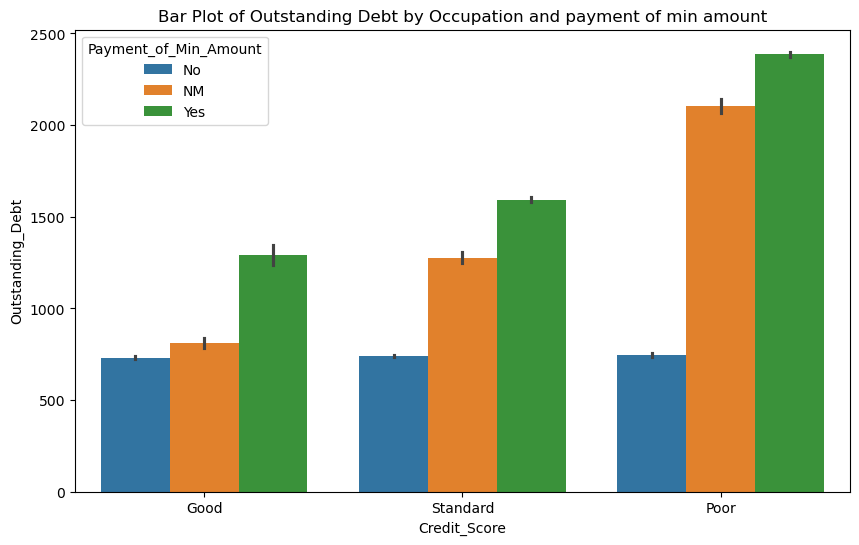

In [196]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Credit_Score', y='Outstanding_Debt', hue='Payment_of_Min_Amount', data=df)
plt.title("Bar Plot of Outstanding Debt by Occupation and payment of min amount")
plt.show()

### Inference

* Higher Debt with Poor Credit Scores: Outstanding debt increases significantly as credit scores worsen.
* Impact of Minimum Payment: Individuals who pay the minimum amount ("Yes") have the highest debt, while those who don’t ("No") have the lowest.
* Debt Gap Widens with Poor Credit: The difference in debt between payment groups is more pronounced in the poor credit score category.
* Stable Debt for "No" Group: Debt levels remain relatively stable for individuals who don’t make minimum payments across all credit scores.

In [218]:
# Dropping Columns

columns_to_drop = ['Age_Group', 'Monthly_Bal_Group']
df = df.drop(columns=columns_to_drop)

**Encoding and Model Building**

In [219]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Define features and target
X = df.drop('Credit_Score', axis=1)  # Replace 'Credit_Score' with the actual target column
y = df['Credit_Score']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




**Scaling**

In [220]:
# Scale the numerical features
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


**Multicollinearity Handling**

In [221]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
# Create a DataFrame for VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_columns
vif_data["VIF"] = [variance_inflation_factor(X_train[numerical_columns].values, i) 
                    for i in range(len(numerical_columns))]

print(vif_data)

                     Feature       VIF
0                        Age  1.078203
1              Annual_Income  1.001149
2      Monthly_Inhand_Salary  1.754738
3          Num_Bank_Accounts  1.934140
4            Num_Credit_Card  1.510000
5              Interest_Rate  2.320024
6                Num_of_Loan  2.038721
7        Delay_from_due_date  1.972933
8     Num_of_Delayed_Payment  1.769407
9       Changed_Credit_Limit  1.289174
10      Num_Credit_Inquiries  1.996421
11          Outstanding_Debt  2.394440
12  Credit_Utilization_Ratio  1.067345
13       Total_EMI_per_month  1.000217
14   Amount_invested_monthly  1.007105
15           Monthly_Balance  2.023043


In [222]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### Base model Building

Since target variable is categorical using LogisticRegression to build model.

In [223]:
from sklearn.linear_model import *

**LogisticRegression**

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

# Train the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

# Predictions on training data
ypred_train = model.predict(X_train)
yprob_train = model.predict_proba(X_train)  

# Predictions on test data
ypred_test = model.predict(X_test)
yprob_test = model.predict_proba(X_test) 

# Evaluation on training data
print("Training Accuracy:", accuracy_score(y_train, ypred_train))
print("\nTraining Classification Report:\n", classification_report(y_train, ypred_train))
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, ypred_train))
print("\nTraining Log Loss:", log_loss(y_train, yprob_train))  

# Evaluation on test data
print("\nTest Accuracy:", accuracy_score(y_test, ypred_test))
print("\nTest Classification Report:\n", classification_report(y_test, ypred_test))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, ypred_test))
print("\nTest Log Loss:", log_loss(y_test, yprob_test)) 

Training Accuracy: 0.6204285714285714

Training Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.50      0.51     12506
           1       0.62      0.50      0.56     20193
           2       0.65      0.73      0.69     37301

    accuracy                           0.62     70000
   macro avg       0.60      0.57      0.58     70000
weighted avg       0.62      0.62      0.62     70000


Training Confusion Matrix:
 [[ 6214   212  6080]
 [ 1550 10130  8513]
 [ 4281  5934 27086]]

Training Log Loss: 0.7938990856998942

Test Accuracy: 0.6166333333333334

Test Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.49      0.50      5322
           1       0.62      0.50      0.56      8805
           2       0.64      0.72      0.68     15873

    accuracy                           0.62     30000
   macro avg       0.59      0.57      0.58     30000
weighted avg       0.61 

**DecisionTreeClassifier**

In [225]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42, max_depth=5)  
model.fit(X_train, y_train)

# Predictions on training data
y_pred_train = model.predict(X_train)
y_prob_train = model.predict_proba(X_train)  

# Predictions on test data
y_pred_test = model.predict(X_test)
y_prob_test = model.predict_proba(X_test)  

# Training Evaluation
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("\nTraining Log Loss:", log_loss(y_train, y_prob_train))  

# Test Evaluation
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nTest Log Loss:", log_loss(y_test, y_prob_test))  


Training Accuracy: 0.7084714285714285

Training Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.68      0.62     12506
           1       0.73      0.64      0.68     20193
           2       0.75      0.75      0.75     37301

    accuracy                           0.71     70000
   macro avg       0.69      0.69      0.69     70000
weighted avg       0.71      0.71      0.71     70000


Training Confusion Matrix:
 [[ 8548   401  3557]
 [ 1539 12976  5678]
 [ 4913  4319 28069]]

Training Log Loss: 0.6740667452149136

Test Accuracy: 0.7022

Test Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.68      0.62      5322
           1       0.73      0.63      0.68      8805
           2       0.74      0.75      0.75     15873

    accuracy                           0.70     30000
   macro avg       0.68      0.69      0.68     30000
weighted avg       0.71      0.70   

**KNeighborsClassifier**

In [228]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
model = KNeighborsClassifier(n_neighbors=5)  
model.fit(X_train, y_train)

# Predictions on training data
y_pred_train = model.predict(X_train)
y_prob_train = model.predict_proba(X_train) 

# Predictions on test data
y_pred_test = model.predict(X_test)
y_prob_test = model.predict_proba(X_test)  

# Training Evaluation
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("\nTraining Log Loss:", log_loss(y_train, y_prob_train))  
# Test Evaluation
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nTest Log Loss:", log_loss(y_test, y_prob_test))  


Training Accuracy: 0.8114857142857143

Training Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74     12506
           1       0.81      0.81      0.81     20193
           2       0.84      0.83      0.84     37301

    accuracy                           0.81     70000
   macro avg       0.79      0.80      0.80     70000
weighted avg       0.81      0.81      0.81     70000


Training Confusion Matrix:
 [[ 9278   248  2980]
 [  780 16417  2996]
 [ 2626  3566 31109]]

Training Log Loss: 0.41286573516832975

Test Accuracy: 0.7075

Test Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.59      0.58      5322
           1       0.72      0.70      0.71      8805
           2       0.74      0.75      0.75     15873

    accuracy                           0.71     30000
   macro avg       0.68      0.68      0.68     30000
weighted avg       0.71      0.71  

**RandomForestClassifier**

In [227]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)  
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_prob_train = rf_model.predict_proba(X_train)  

y_pred_test = rf_model.predict(X_test)
y_prob_test = rf_model.predict_proba(X_test) 

# Training Evaluation
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("\nTraining Log Loss:", log_loss(y_train, y_prob_train))  

# Test Evaluation
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nTest Log Loss:", log_loss(y_test, y_prob_test))  


Training Accuracy: 0.6802

Training Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.60      0.57     12506
           1       0.72      0.63      0.67     20193
           2       0.71      0.74      0.72     37301

    accuracy                           0.68     70000
   macro avg       0.66      0.65      0.65     70000
weighted avg       0.68      0.68      0.68     70000


Training Confusion Matrix:
 [[ 7453   110  4943]
 [ 1287 12667  6239]
 [ 5022  4785 27494]]

Training Log Loss: 0.7029162008470344

Test Accuracy: 0.6751666666666667

Test Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.59      0.56      5322
           1       0.71      0.63      0.67      8805
           2       0.70      0.73      0.72     15873

    accuracy                           0.68     30000
   macro avg       0.65      0.65      0.65     30000
weighted avg       0.68      0.68   

### Improving Model Performance with Ensemble Methods 

Tuning the models by selecting important features and building models. 

##### Using RandomizedSearchCV

**Tuned Random forest**

In [239]:
param_dist = {
    'n_estimators': np.arange(50, 300, 50),  
    'max_depth': [5, 10, 15],  
    'min_samples_split': [5, 10, 20],  
    'min_samples_leaf': [2, 4, 6],  
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_dist, 
    n_iter=20, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42
)
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Feature Importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select features contributing to 85% of total importance
feature_importances['Cumulative_Importance'] = feature_importances['Importance'].cumsum()
selected_features_rf = feature_importances[feature_importances['Cumulative_Importance'] <= 0.85]['Feature'].tolist()

# Filter dataset to include only selected features
X_train_selected = X_train[selected_features_rf]
X_test_selected = X_test[selected_features_rf]

# Train model with selected features
best_rf.fit(X_train_selected, y_train)

# Predictions
y_pred_train = best_rf.predict(X_train_selected)
y_prob_train = best_rf.predict_proba(X_train_selected)  
y_pred_test = best_rf.predict(X_test_selected)
y_prob_test = best_rf.predict_proba(X_test_selected) 

# Evaluation Metrics
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("\nTraining Log Loss:", log_loss(y_train, y_prob_train))  

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nTest Log Loss:", log_loss(y_test, y_prob_test))    


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15}
Training Accuracy: 0.8155142857142857

Training Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75     12506
           1       0.83      0.81      0.82     20193
           2       0.85      0.82      0.84     37301

    accuracy                           0.82     70000
   macro avg       0.79      0.81      0.80     70000
weighted avg       0.82      0.82      0.82     70000


Training Confusion Matrix:
 [[10026    82  2398]
 [ 1014 16367  2812]
 [ 3333  3275 30693]]

Training Log Loss: 0.48435875462043654

Test Accuracy: 0.7576

Test Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.74      0.68      5322
           1       0.77      0.75      0.76      8805
         

In [240]:
print("\nSelected Features contributing to 85% Importance:")
for feature in selected_features_rf:
    print(feature)


Selected Features contributing to 85% Importance:
Outstanding_Debt
Credit_Mix
Interest_Rate
Delay_from_due_date
Changed_Credit_Limit
Num_Credit_Card
Num_Credit_Inquiries
Num_of_Delayed_Payment
Payment_of_Min_Amount
Num_Bank_Accounts
Total_EMI_per_month
Annual_Income
Num_of_Loan
Monthly_Inhand_Salary


**Tuned KNN**

In [241]:
from sklearn.feature_selection import mutual_info_classif

#  feature importance using mutual information
feature_importances = mutual_info_classif(X_train, y_train)

# DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# features contributing to 80% of total importance
cumulative_importance = np.cumsum(feature_importance_df['Importance'])
total_importance = feature_importance_df['Importance'].sum()
selected_features = feature_importance_df[cumulative_importance <= 0.80 * total_importance]['Feature'].tolist()

# Filter dataset with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

param_grid = {
    'n_neighbors': range(1, 31, 2),  
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2] 
}

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(
    knn, param_distributions=param_grid, 
    n_iter=20, cv=5, scoring='f1_weighted', 
    n_jobs=-1, random_state=42, verbose=1
)
random_search.fit(X_train_selected, y_train)
best_knn = random_search.best_estimator_

# Predictions
y_pred_train = best_knn.predict(X_train_selected)
y_prob_train = best_knn.predict_proba(X_train_selected)

y_pred_test = best_knn.predict(X_test_selected)
y_prob_test = best_knn.predict_proba(X_test_selected)

# Training Evaluation
print("Best Parameters:", random_search.best_params_)
print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("\nTraining Log Loss:", log_loss(y_train, y_prob_train))  

# Test Evaluation
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nTest Log Loss:", log_loss(y_test, y_prob_test))  


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'metric': 'manhattan'}

Training Accuracy: 0.9187714285714286

Training Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     12506
           1       0.88      0.96      0.92     20193
           2       0.96      0.88      0.92     37301

    accuracy                           0.92     70000
   macro avg       0.91      0.93      0.92     70000
weighted avg       0.92      0.92      0.92     70000


Training Confusion Matrix:
 [[11867     1   638]
 [    5 19457   731]
 [ 1714  2597 32990]]

Training Log Loss: 0.15985414872663367

Test Accuracy: 0.7793333333333333

Test Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      5322
           1       0.76      0.83      0.79      8805
           2       0.82      0.76

In [242]:
print("\nSelected Features contributing to 80% Importance:")
for feature in selected_features:
    print(feature)


Selected Features contributing to 80% Importance:
Outstanding_Debt
Annual_Income
Total_EMI_per_month
Monthly_Inhand_Salary
Type_of_Loan
Credit_Mix
Interest_Rate
Delay_from_due_date


**Tuned DecisionTreeClassifier**

In [243]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],  
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

model = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(
    model, param_dist, n_iter=50, cv=5, scoring='f1_weighted', 
    n_jobs=-1, random_state=42, verbose=1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Feature Importance (85%)
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select features contributing to 85% of total importance
cumulative_importance = np.cumsum(feature_importance_df['Importance'])
total_importance = feature_importance_df['Importance'].sum()
selected_features_dt = feature_importance_df[cumulative_importance <= 0.85 * total_importance]['Feature'].tolist()

# Filter dataset with selected features
X_train_selected = X_train[selected_features_dt]
X_test_selected = X_test[selected_features_dt]

# Train Decision Tree with selected features
best_model.fit(X_train_selected, y_train)

# Predictions
y_pred_train = best_model.predict(X_train_selected)
y_prob_train = best_model.predict_proba(X_train_selected)

y_pred_test = best_model.predict(X_test_selected)
y_prob_test = best_model.predict_proba(X_test_selected)

# Training Evaluation
print("Best Parameters:", random_search.best_params_)
print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("\nTraining Log Loss:", log_loss(y_train, y_prob_train))  

# Test Evaluation
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nTest Log Loss:", log_loss(y_test, y_prob_test))  
 


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': None, 'max_depth': 15, 'criterion': 'gini', 'class_weight': None}

Training Accuracy: 0.7591571428571429

Training Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.72      0.68     12506
           1       0.77      0.73      0.75     20193
           2       0.80      0.79      0.79     37301

    accuracy                           0.76     70000
   macro avg       0.74      0.75      0.74     70000
weighted avg       0.76      0.76      0.76     70000


Training Confusion Matrix:
 [[ 8973   379  3154]
 [ 1122 14832  4239]
 [ 3933  4032 29336]]

Training Log Loss: 0.5345184785905526

Test Accuracy: 0.7141333333333333

Test Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.66      0.62      5322
           1       0.72      0

In [244]:
print("\nSelected Features contributing to 80% Importance:")
for feature in selected_features_dt:
    print(feature)


Selected Features contributing to 80% Importance:
Outstanding_Debt
Credit_Mix
Interest_Rate
Delay_from_due_date
Changed_Credit_Limit
Num_Credit_Card
Total_EMI_per_month
Type_of_Loan
Month


**xgb_model**

In [ ]:
pip install xgboost

In [255]:
import xgboost as xgb

param_dist = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [3, 4, 5],           
    'learning_rate': [0.01, 0.05, 0.1],  
    'subsample': [0.7, 0.8, 0.85],     
    'colsample_bytree': [0.7, 0.8, 0.85], 
    'reg_alpha': [0, 0.1, 0.5],        
    'reg_lambda': [0.5, 1, 1.5],       
    'scale_pos_weight': [1, 1.2, 1.5]  
}

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42
)

random_search = RandomizedSearchCV(
    xgb_model, param_dist, n_iter=20, cv=5, 
    scoring='accuracy', n_jobs=-1, verbose=2
)

random_search.fit(X_train, y_train)

print("\nBest Parameters:", random_search.best_params_, "\n")

# Get best estimator
best_xgb = random_search.best_estimator_

# Feature Importance for 90% Selection
feature_importances = best_xgb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# cumulative importance
cumulative_importance = np.cumsum(feature_importance_df['Importance'])
total_importance = feature_importance_df['Importance'].sum()

# top features contributing to 90% importance
selected_features_xgb = feature_importance_df[cumulative_importance <= 0.90 * total_importance]['Feature'].tolist()

# Filter dataset with selected features
X_train_selected = X_train[selected_features_xgb]
X_test_selected = X_test[selected_features_xgb]

# Training
best_xgb.fit(X_train_selected, y_train)

# Predictions
y_pred_train = best_xgb.predict(X_train_selected)
y_prob_train = best_xgb.predict_proba(X_train_selected)

y_pred_test = best_xgb.predict(X_test_selected)
y_prob_test = best_xgb.predict_proba(X_test_selected)

# Evaluate Performance
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("Training Log Loss:", log_loss(y_train, y_prob_train), "\n")

print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Test Log Loss:", log_loss(y_test, y_prob_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 1, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8} 

Training Accuracy: 0.7158428571428571
Training Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.66      0.62     12506
           1       0.72      0.68      0.70     20193
           2       0.76      0.76      0.76     37301

    accuracy                           0.72     70000
   macro avg       0.69      0.70      0.69     70000
weighted avg       0.72      0.72      0.72     70000

Training Confusion Matrix:
 [[ 8236   747  3523]
 [ 1257 13659  5277]
 [ 4593  4494 28214]]
Training Log Loss: 0.6272995953721927 

Test Accuracy: 0.7058666666666666
Test Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.65      0.61      5322

In [257]:
print("\nSelected Features contributing to 90% Importance:")
for feature in selected_features_xgb:
    print(feature)


Selected Features contributing to 90% Importance:
Payment_of_Min_Amount
Credit_Mix
Outstanding_Debt
Interest_Rate
Num_Credit_Card
Delay_from_due_date
Month
Changed_Credit_Limit
Num_Credit_Inquiries


**Lightgbm**

In [ ]:
pip install lightgbm

In [252]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=3, random_state=42)

param_dist = {
    'n_estimators': [100, 150, 200], 
    'max_depth': [3, 5, 7],            
    'learning_rate': [0.01, 0.05, 0.1],  
    'subsample': [0.8, 0.85, 0.9],    
    'colsample_bytree': [0.7, 0.8],    
    'reg_alpha': [0, 0.1],             
    'reg_lambda': [0.5, 1]             
}

random_search = RandomizedSearchCV(
    estimator=lgb_model, param_distributions=param_dist, 
    n_iter=10, cv=5, scoring='accuracy', verbose=2, 
    n_jobs=-1, random_state=42
)

random_search.fit(X_train, y_train)

print("\nBest Parameters from Random Search:", random_search.best_params_, "\n")

# best estimator
best_lgb = random_search.best_estimator_

# Feature Importance for 85% Selection
feature_importances = best_lgb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# cumulative importance
cumulative_importance = np.cumsum(feature_importance_df['Importance'])
total_importance = feature_importance_df['Importance'].sum()

# top features contributing to 85% importance
selected_features_lgb = feature_importance_df[cumulative_importance <= 0.85 * total_importance]['Feature'].tolist()

# Filter dataset with selected features
X_train_selected = X_train[selected_features_lgb]
X_test_selected = X_test[selected_features_lgb]

# Train LightGBM with selected features
best_lgb.fit(X_train_selected, y_train)

# Predictions
y_pred_train = best_lgb.predict(X_train_selected)
y_prob_train = best_lgb.predict_proba(X_train_selected)

y_pred_test = best_lgb.predict(X_test_selected)
y_prob_test = best_lgb.predict_proba(X_test_selected)

# Evaluate Model Performance
print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("\nTraining Log Loss:", log_loss(y_train, y_prob_train), "\n")

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nTest Log Loss:", log_loss(y_test, y_prob_test))




Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2574
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 22
[LightGBM] [Info] Start training from score -1.722287
[LightGBM] [Info] Start training from score -1.243159
[LightGBM] [Info] Start training from score -0.629475

Best Parameters from Random Search: {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8} 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2026
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 15
[LightGBM] [Info] Star

In [253]:
print("\nSelected Features contributing to 85% Importance:")
for feature in selected_features_lgb:
    print(feature)


Selected Features contributing to 85% Importance:
Outstanding_Debt
Total_EMI_per_month
Annual_Income
Type_of_Loan
Changed_Credit_Limit
Interest_Rate
Delay_from_due_date
Age
Monthly_Inhand_Salary
Occupation
Num_Credit_Card
Num_Credit_Inquiries
Num_of_Delayed_Payment
Month
Monthly_Balance


**StackingClassifier**

In [258]:
from sklearn.ensemble import StackingClassifier

# Base models 
base_models = [
    ('dt', best_model),    # Decision Tree
    ('xgb', best_xgb),     # XGBoost
    ('lgb', best_lgb)      # LightGBM
]

# Meta-model: Random Forest 
meta_model = best_rf

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True, n_jobs=-1)

# Feature Selection 
selected_features = list(set(selected_features_rf + selected_features_dt + selected_features_xgb + selected_features_lgb))
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train Stacking Model
stacking_clf.fit(X_train_selected, y_train)

# Predictions
y_pred_train = stacking_clf.predict(X_train_selected)
y_prob_train = stacking_clf.predict_proba(X_train_selected)
y_pred_test = stacking_clf.predict(X_test_selected)
y_prob_test = stacking_clf.predict_proba(X_test_selected)

# Evaluation Metrics
print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("\nTraining Log Loss:", log_loss(y_train, y_prob_train))

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nTest Log Loss:", log_loss(y_test, y_prob_test))



Training Accuracy: 0.8263285714285714

Training Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79     12506
           1       0.80      0.86      0.83     20193
           2       0.86      0.82      0.84     37301

    accuracy                           0.83     70000
   macro avg       0.81      0.83      0.82     70000
weighted avg       0.83      0.83      0.83     70000


Training Confusion Matrix:
 [[10128   163  2215]
 [  339 17310  2544]
 [ 2608  4288 30405]]

Training Log Loss: 0.4344078577791632

Test Accuracy: 0.7719333333333334

Test Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      5322
           1       0.75      0.79      0.77      8805
           2       0.81      0.77      0.79     15873

    accuracy                           0.77     30000
   macro avg       0.75      0.77      0.76     30000
weighted avg       0.77

In [259]:
print("\nSelected Features:")
for feature in selected_features:
    print(feature)


Selected Features:
Monthly_Inhand_Salary
Changed_Credit_Limit
Num_Credit_Inquiries
Interest_Rate
Num_Credit_Card
Delay_from_due_date
Age
Month
Num_Bank_Accounts
Outstanding_Debt
Occupation
Num_of_Delayed_Payment
Total_EMI_per_month
Monthly_Balance
Credit_Mix
Type_of_Loan
Annual_Income
Payment_of_Min_Amount
Num_of_Loan
